In [1]:
import pandas as pd

# Define the file path
file_path = r"D:\GenAI SU\Technical Writing\dual\analysis\result.xlsx"

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())


  web_server  prompt_type                                             prompt  \
0      flask  Explanation                         Explain quantum mechanics.   
1      flask      Logical                 What are the three laws of motion?   
2      flask     Creative  Write a short story about a robot discovering ...   
3      flask    Numerical  What is the next number in the series: 1, 4, 9...   
4      flask  Comparative  Compare the features of Python and Java progra...   

               peer1_llm  peer1_total_duration  peer1_load_duration  \
0  qwen2.5:0.5b-instruct           41128627200           2166111495   
1  qwen2.5:0.5b-instruct           34644719364             82255077   
2  qwen2.5:0.5b-instruct           38747385670             88010270   
3  qwen2.5:0.5b-instruct           25832170599             69732870   
4  qwen2.5:0.5b-instruct           68046583136             68678417   

   peer1_prompt_eval_count  peer1_prompt_eval_duration  peer1_eval_count  \
0               

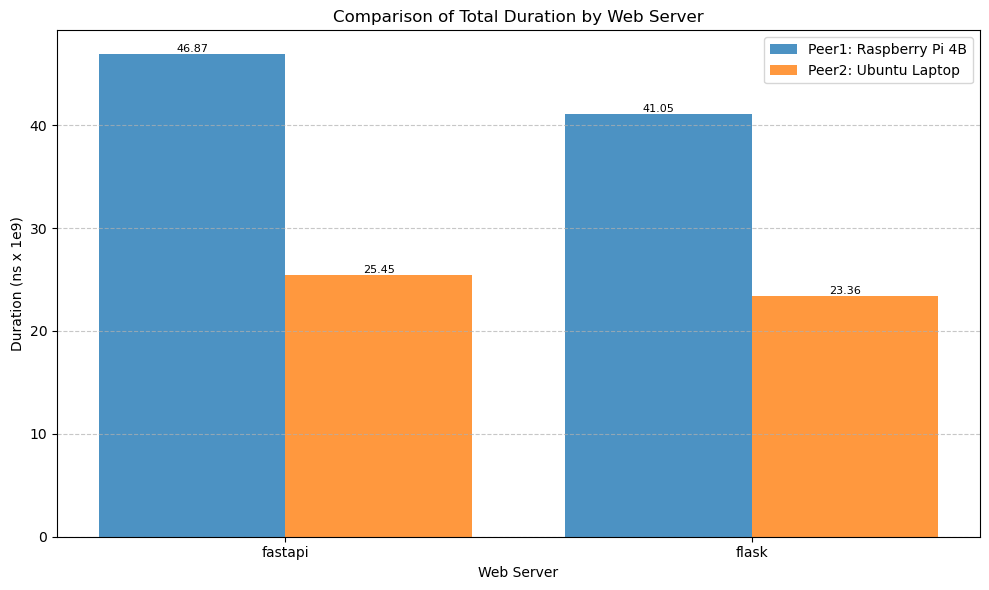

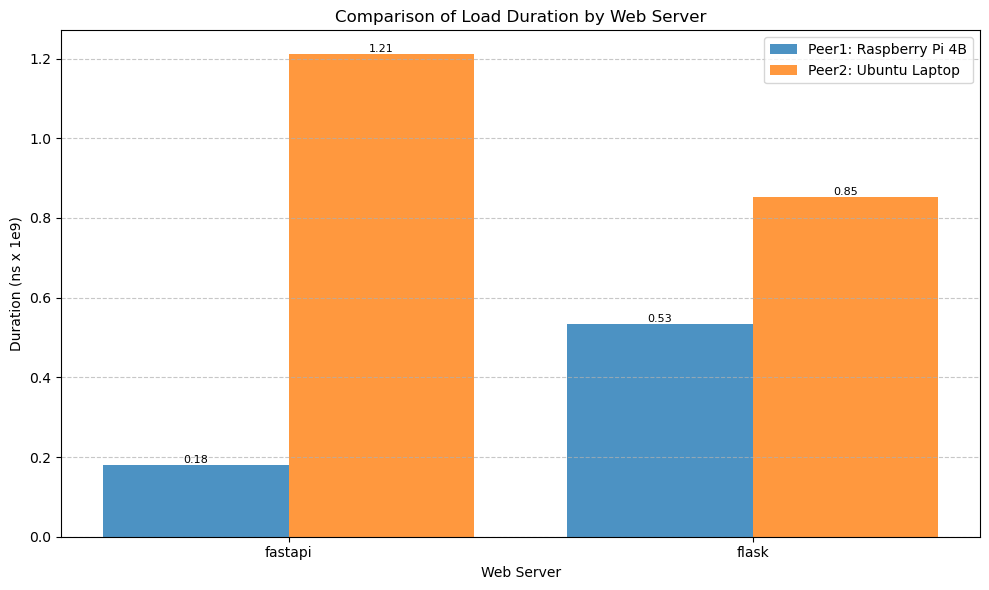

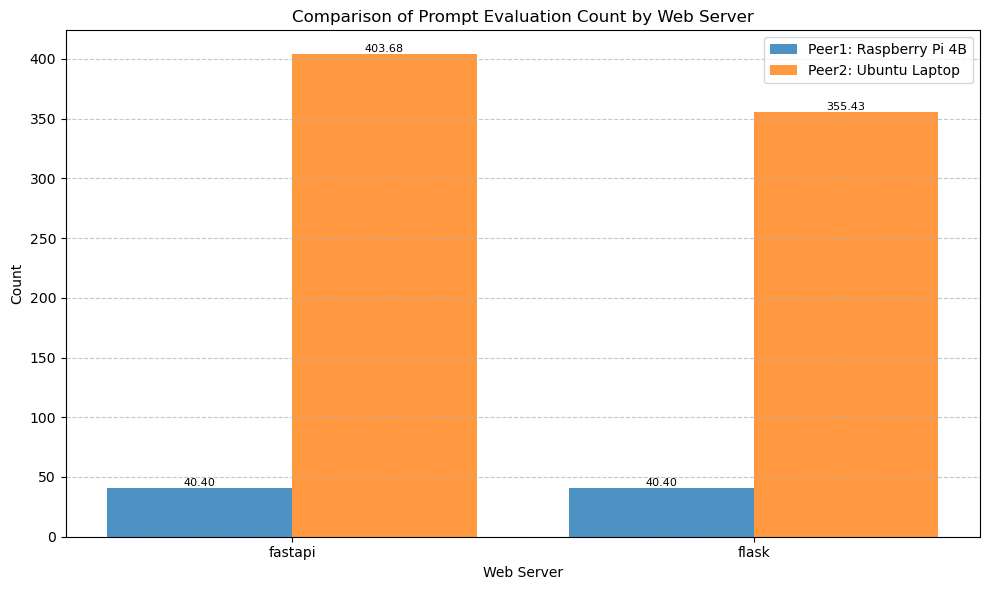

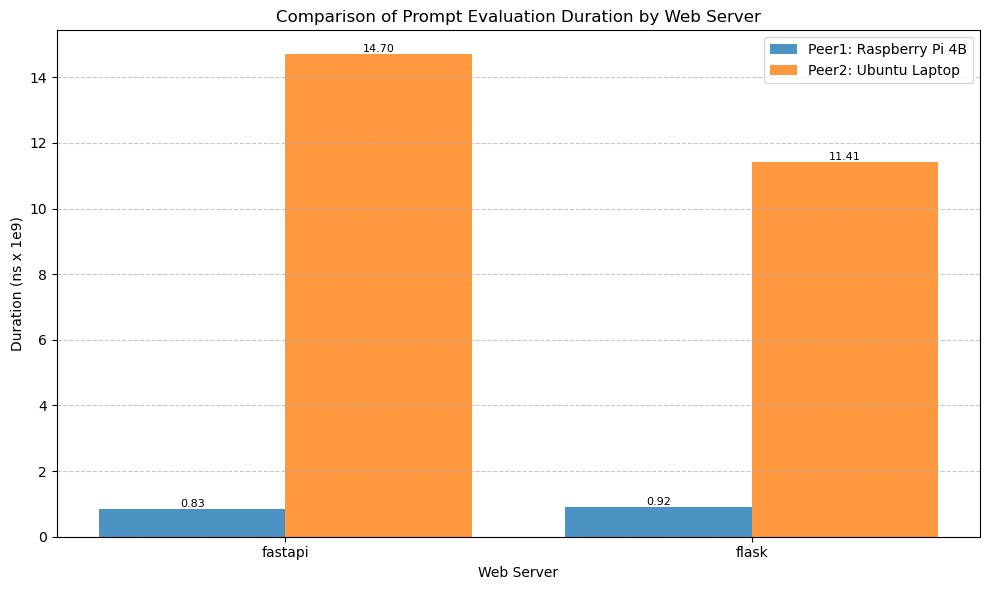

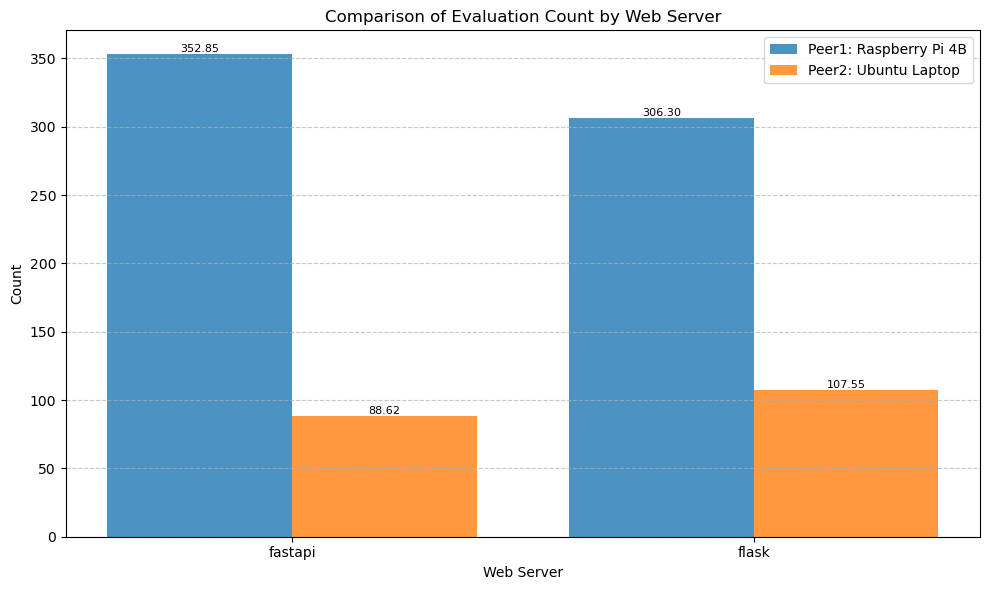

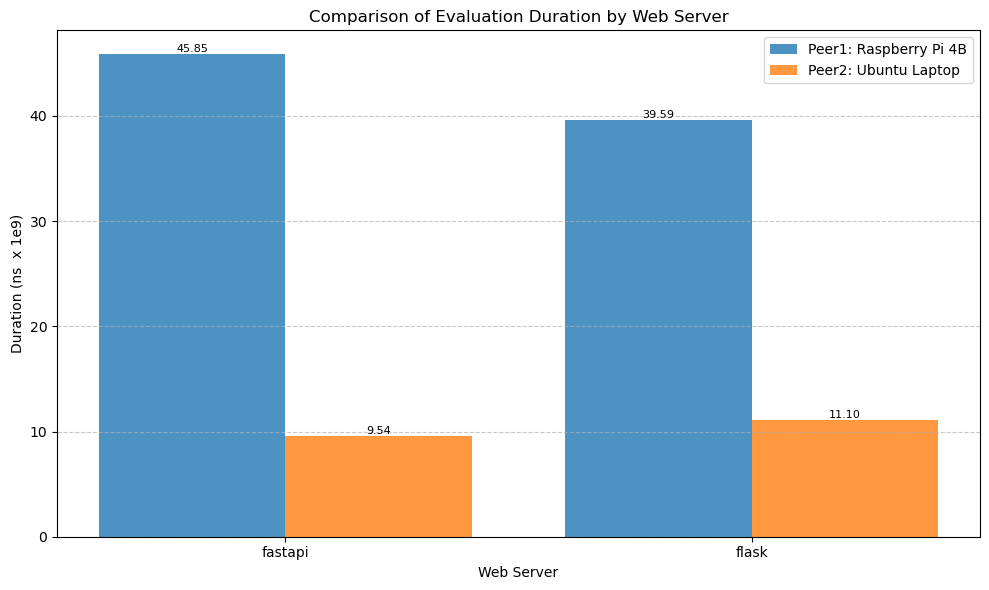

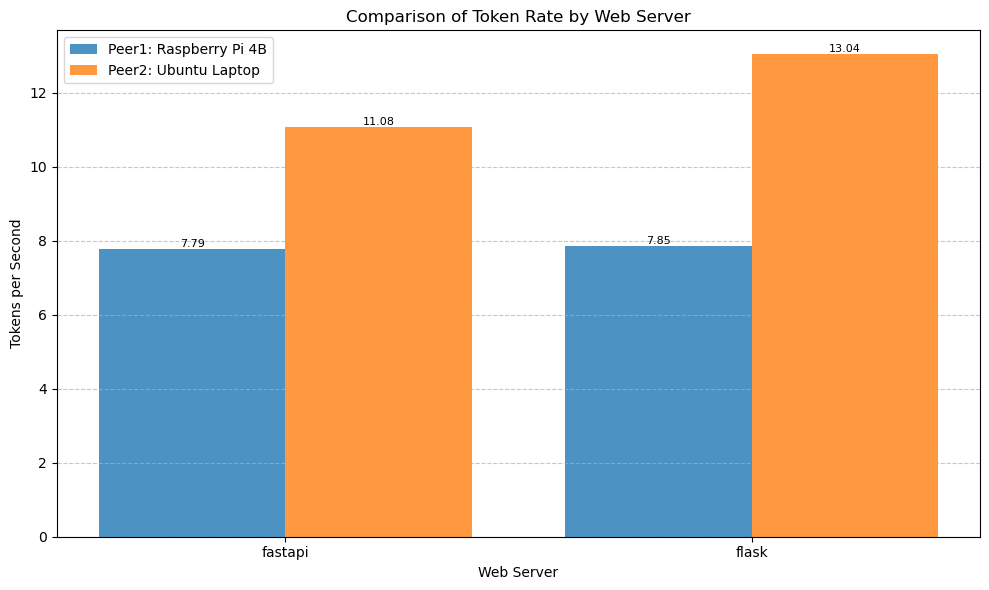

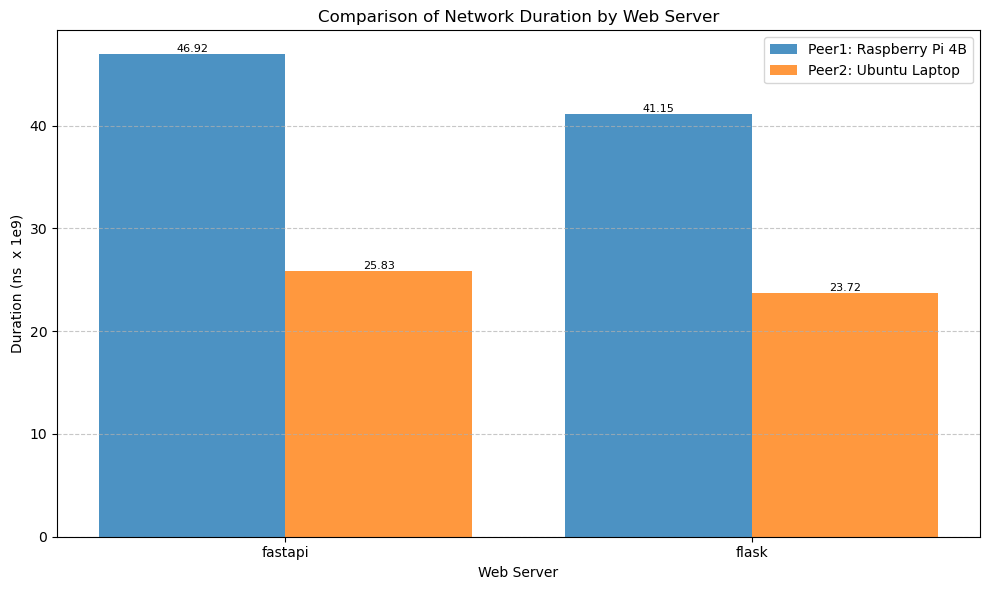

In [2]:
##### Comparison by web_server

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Define the columns for peer1 and peer2
peer1_columns = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration",
]

peer2_columns = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration",
]

# Define scale factors for individual metrics
scale_factors = {
    "peer1_total_duration": 1e9,  # nanoseconds to milliseconds
    "peer2_total_duration": 1e9,
    "peer1_load_duration": 1e9,
    "peer2_load_duration": 1e9,
    "peer1_prompt_eval_count": 1,  # no scaling for counts
    "peer2_prompt_eval_count": 1,
    "peer1_prompt_eval_duration": 1e9,
    "peer2_prompt_eval_duration": 1e9,
    "peer1_eval_count": 1,
    "peer2_eval_count": 1,
    "peer1_eval_duration": 1e9,
    "peer2_eval_duration": 1e9,
    "peer1_token_per_second": 1,
    "peer2_token_per_second": 1,
    "peer1_network_duration": 1e9,
    "peer2_network_duration": 1e9,
}

# Calculate averages grouped by web_server
averages_by_web_server = df.groupby("web_server").mean(numeric_only=True)

# Function to plot each metric
def plot_metric(peer1_col, peer2_col, title, ylabel):
    plt.figure(figsize=(10, 6))
    peer1_avg = averages_by_web_server[peer1_col] / scale_factors[peer1_col]
    peer2_avg = averages_by_web_server[peer2_col] / scale_factors[peer2_col]
    x = np.arange(len(averages_by_web_server))
    plt.bar(x - 0.2, peer1_avg, width=0.4, label="Peer1: Raspberry Pi 4B", alpha=0.8)
    plt.bar(x + 0.2, peer2_avg, width=0.4, label="Peer2: Ubuntu Laptop", alpha=0.8)
    for i, (p1, p2) in enumerate(zip(peer1_avg, peer2_avg)):
        plt.text(x[i] - 0.2, p1, f"{p1:.2f}", ha="center", va="bottom", fontsize=8)
        plt.text(x[i] + 0.2, p2, f"{p2:.2f}", ha="center", va="bottom", fontsize=8)
    plt.title(title)
    plt.xlabel("Web Server")
    plt.ylabel(ylabel)
    plt.xticks(x, averages_by_web_server.index)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot each metric
plot_metric("peer1_total_duration", "peer2_total_duration", "Comparison of Total Duration by Web Server", "Duration (ns x 1e9)")
plot_metric("peer1_load_duration", "peer2_load_duration", "Comparison of Load Duration by Web Server", "Duration (ns x 1e9)")
plot_metric("peer1_prompt_eval_count", "peer2_prompt_eval_count", "Comparison of Prompt Evaluation Count by Web Server", "Count")
plot_metric("peer1_prompt_eval_duration", "peer2_prompt_eval_duration", "Comparison of Prompt Evaluation Duration by Web Server", "Duration (ns x 1e9)")
plot_metric("peer1_eval_count", "peer2_eval_count", "Comparison of Evaluation Count by Web Server", "Count")
plot_metric("peer1_eval_duration", "peer2_eval_duration", "Comparison of Evaluation Duration by Web Server", "Duration (ns  x 1e9)")
plot_metric("peer1_token_per_second", "peer2_token_per_second", "Comparison of Token Rate by Web Server", "Tokens per Second")
plot_metric("peer1_network_duration", "peer2_network_duration", "Comparison of Network Duration by Web Server", "Duration (ns  x 1e9)")


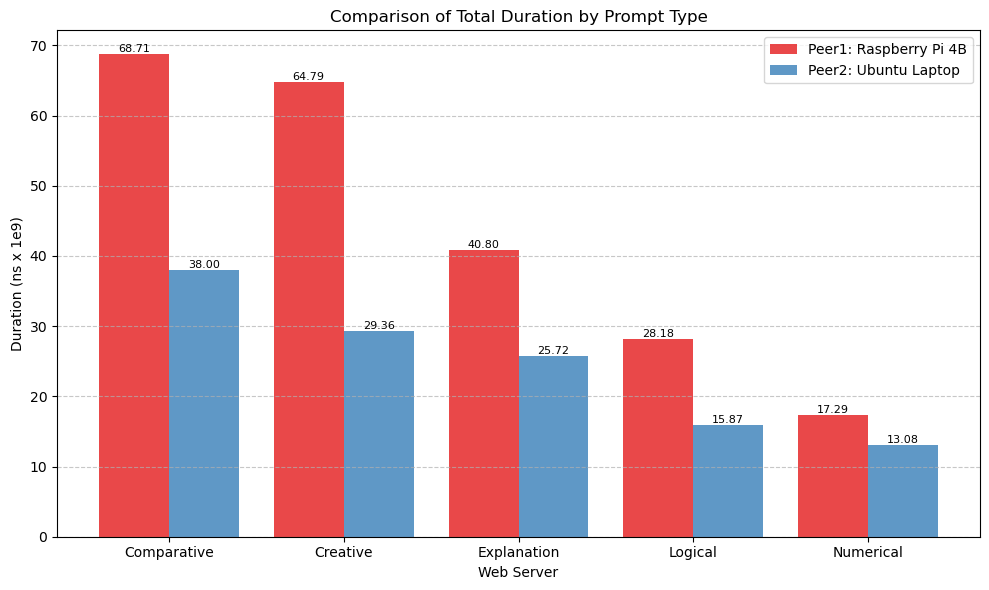

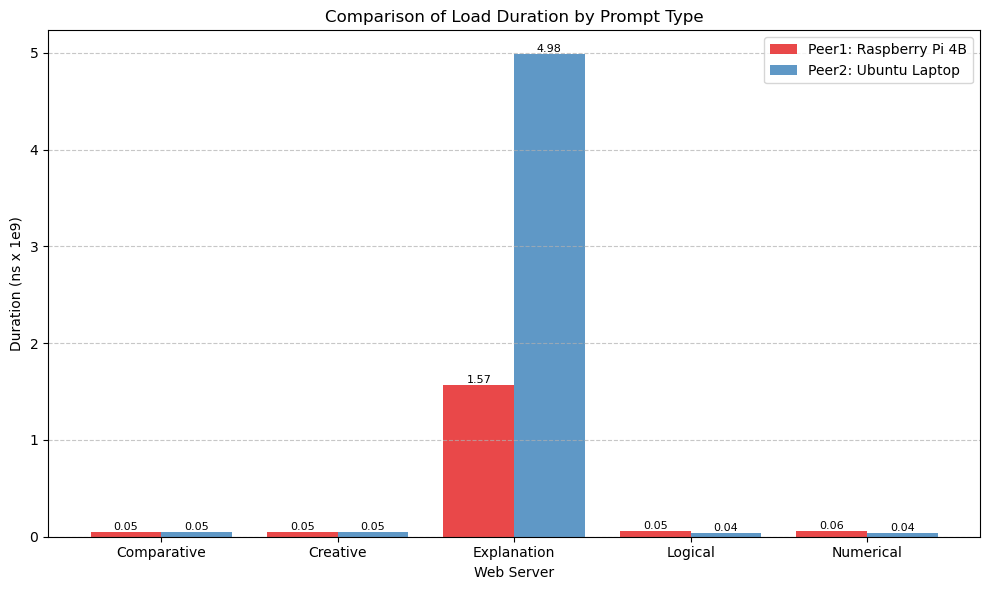

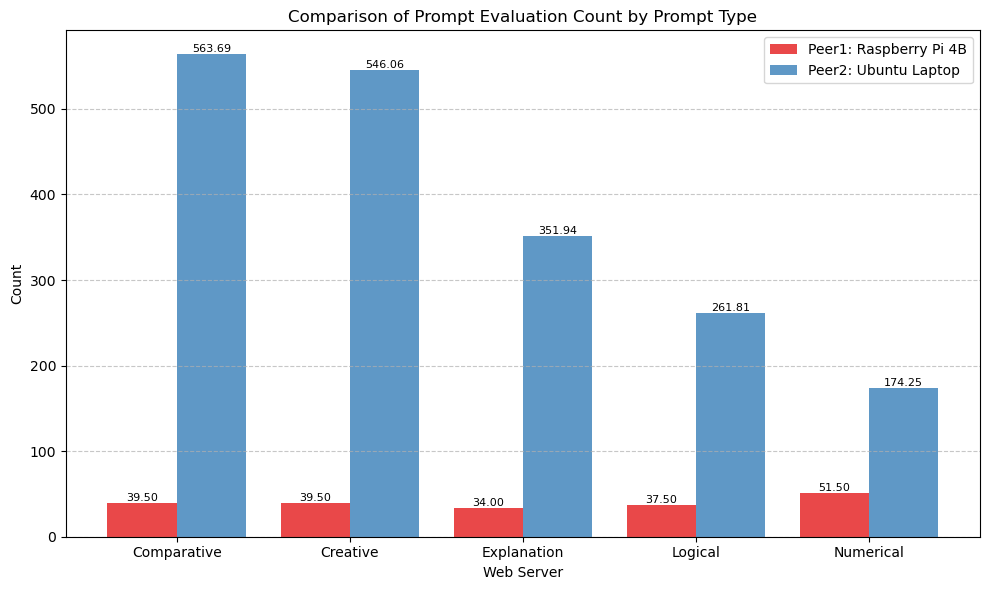

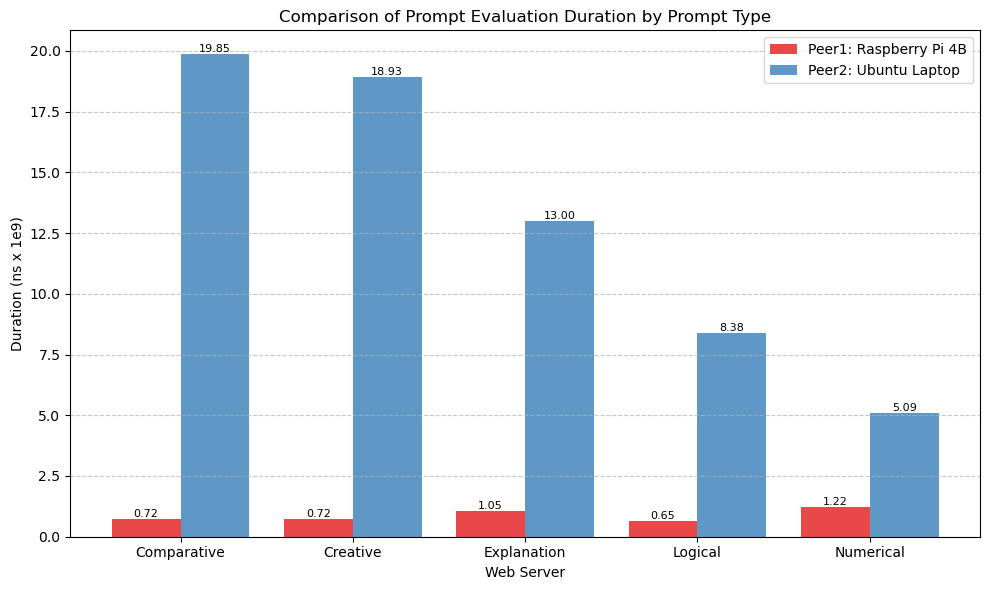

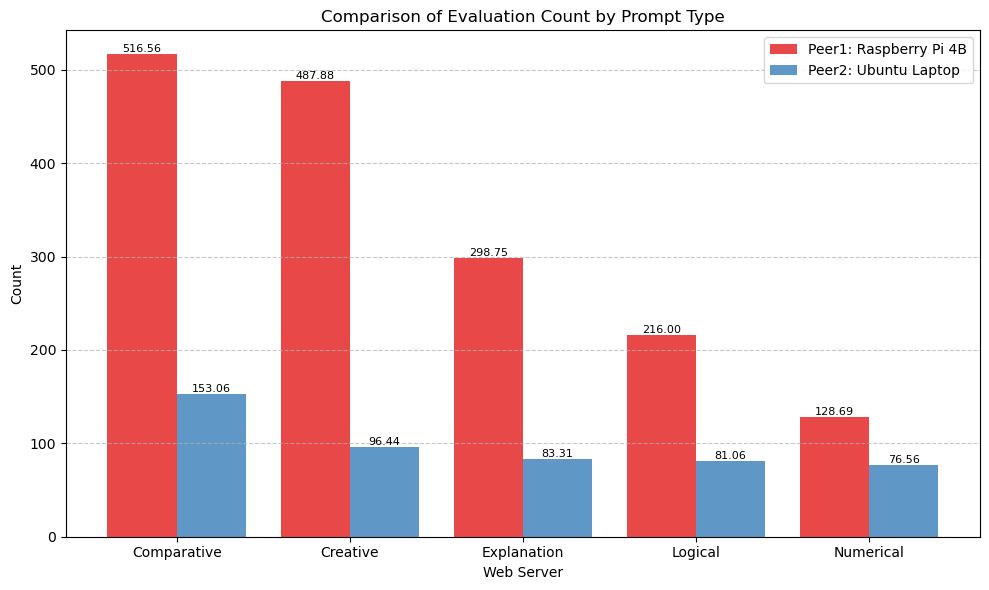

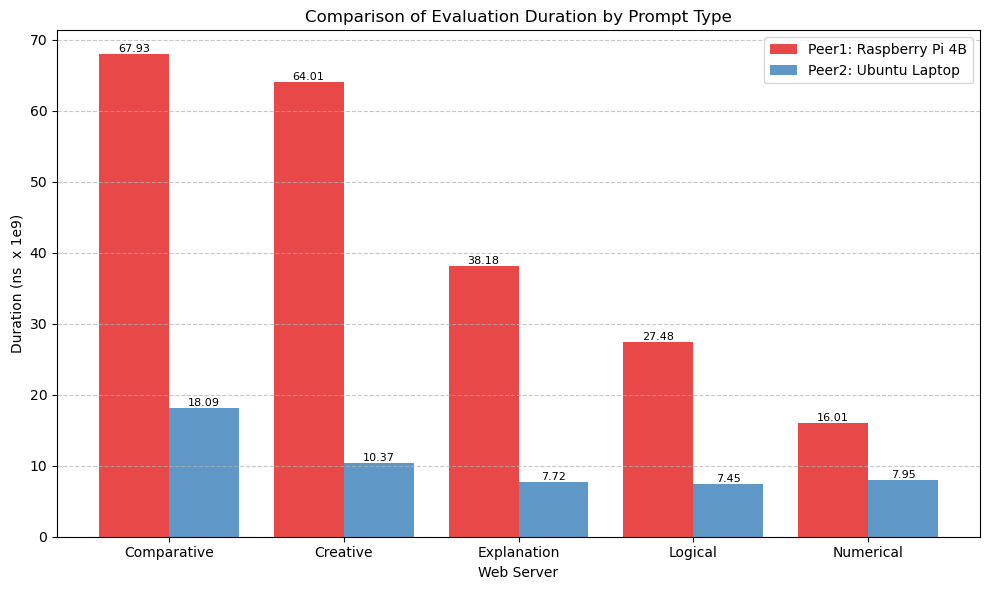

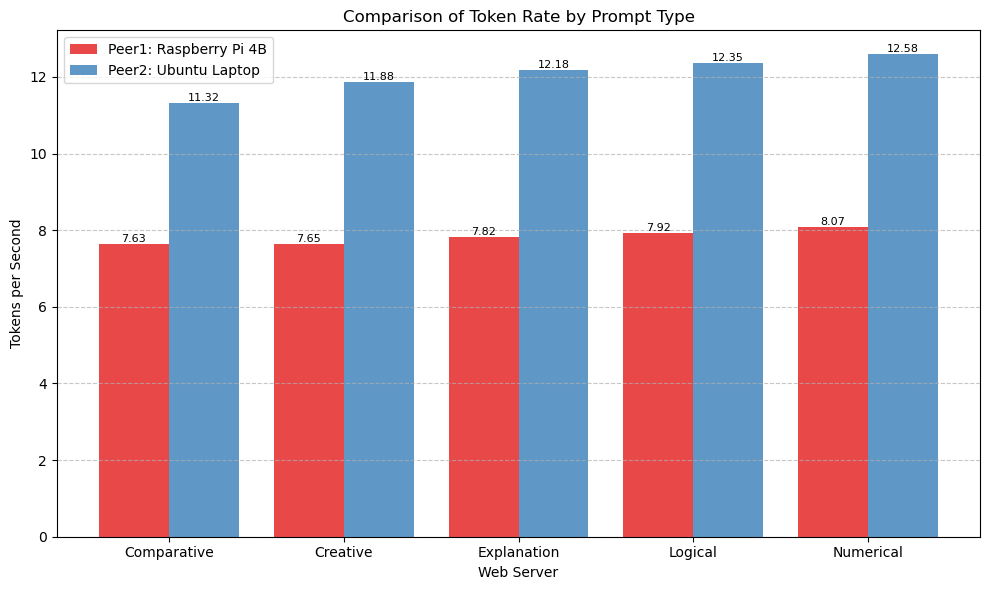

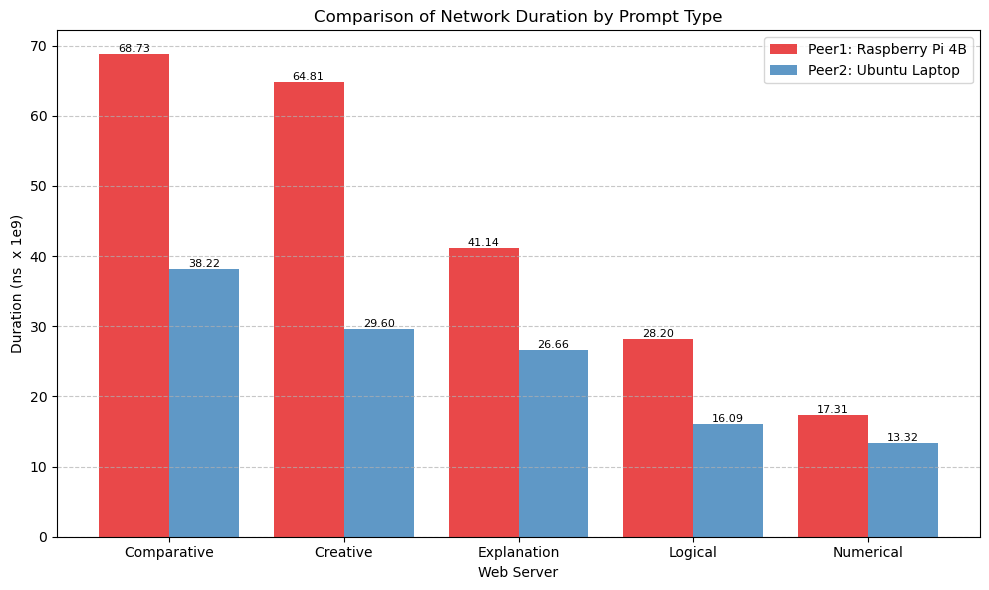

In [3]:
##### Comparison by prompt_type

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define the columns for peer1 and peer2
peer1_columns = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration",
]

peer2_columns = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration",
]

# Define scale factors for individual metrics
scale_factors = {
    "peer1_total_duration": 1e9,  # nanoseconds to milliseconds
    "peer2_total_duration": 1e9,
    "peer1_load_duration": 1e9,
    "peer2_load_duration": 1e9,
    "peer1_prompt_eval_count": 1,  # no scaling for counts
    "peer2_prompt_eval_count": 1,
    "peer1_prompt_eval_duration": 1e9,
    "peer2_prompt_eval_duration": 1e9,
    "peer1_eval_count": 1,
    "peer2_eval_count": 1,
    "peer1_eval_duration": 1e9,
    "peer2_eval_duration": 1e9,
    "peer1_token_per_second": 1,
    "peer2_token_per_second": 1,
    "peer1_network_duration": 1e9,
    "peer2_network_duration": 1e9,
}

# Calculate averages grouped by web_server
averages_by_web_server = df.groupby("prompt_type").mean(numeric_only=True)

# Define a color palette
palette = sns.color_palette("Set1")

# Function to plot each metric
def plot_metric(peer1_col, peer2_col, title, ylabel):
    plt.figure(figsize=(10, 6))
    peer1_avg = averages_by_web_server[peer1_col] / scale_factors[peer1_col]
    peer2_avg = averages_by_web_server[peer2_col] / scale_factors[peer2_col]
    x = np.arange(len(averages_by_web_server))
    plt.bar(x - 0.2, peer1_avg, width=0.4, color=palette[0], label="Peer1: Raspberry Pi 4B", alpha=0.8)
    plt.bar(x + 0.2, peer2_avg, width=0.4, color=palette[1], label="Peer2: Ubuntu Laptop", alpha=0.8)
    for i, (p1, p2) in enumerate(zip(peer1_avg, peer2_avg)):
        plt.text(x[i] - 0.2, p1, f"{p1:.2f}", ha="center", va="bottom", fontsize=8)
        plt.text(x[i] + 0.2, p2, f"{p2:.2f}", ha="center", va="bottom", fontsize=8)
    plt.title(title)
    plt.xlabel("Web Server")
    plt.ylabel(ylabel)
    plt.xticks(x, averages_by_web_server.index)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot each metric
plot_metric("peer1_total_duration", "peer2_total_duration", "Comparison of Total Duration by Prompt Type", "Duration (ns x 1e9)")
plot_metric("peer1_load_duration", "peer2_load_duration", "Comparison of Load Duration by Prompt Type", "Duration (ns x 1e9)")
plot_metric("peer1_prompt_eval_count", "peer2_prompt_eval_count", "Comparison of Prompt Evaluation Count by Prompt Type", "Count")
plot_metric("peer1_prompt_eval_duration", "peer2_prompt_eval_duration", "Comparison of Prompt Evaluation Duration by Prompt Type", "Duration (ns x 1e9)")
plot_metric("peer1_eval_count", "peer2_eval_count", "Comparison of Evaluation Count by Prompt Type", "Count")
plot_metric("peer1_eval_duration", "peer2_eval_duration", "Comparison of Evaluation Duration by Prompt Type", "Duration (ns  x 1e9)")
plot_metric("peer1_token_per_second", "peer2_token_per_second", "Comparison of Token Rate by Prompt Type", "Tokens per Second")
plot_metric("peer1_network_duration", "peer2_network_duration", "Comparison of Network Duration by Prompt Type", "Duration (ns  x 1e9)")


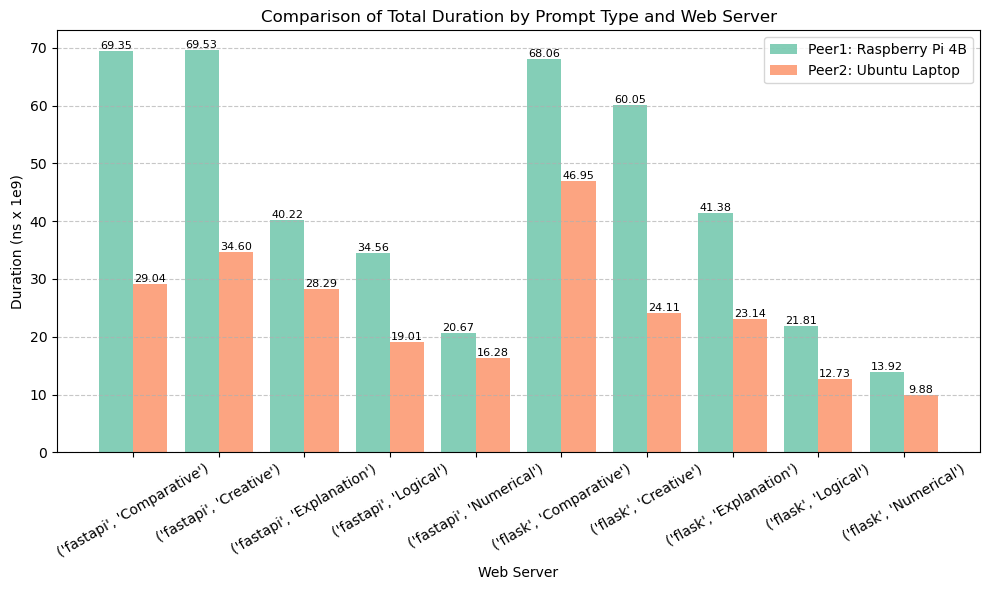

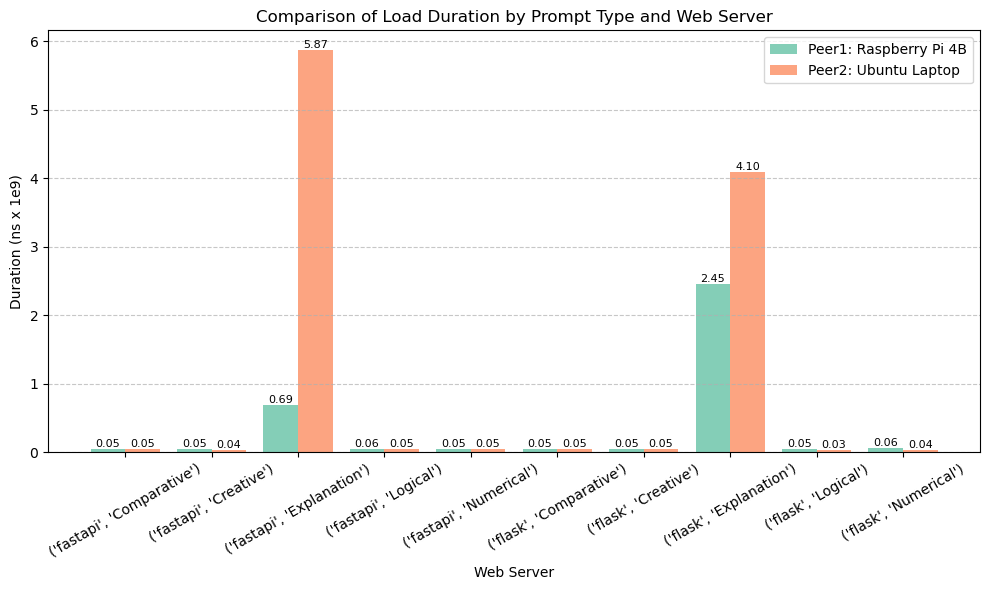

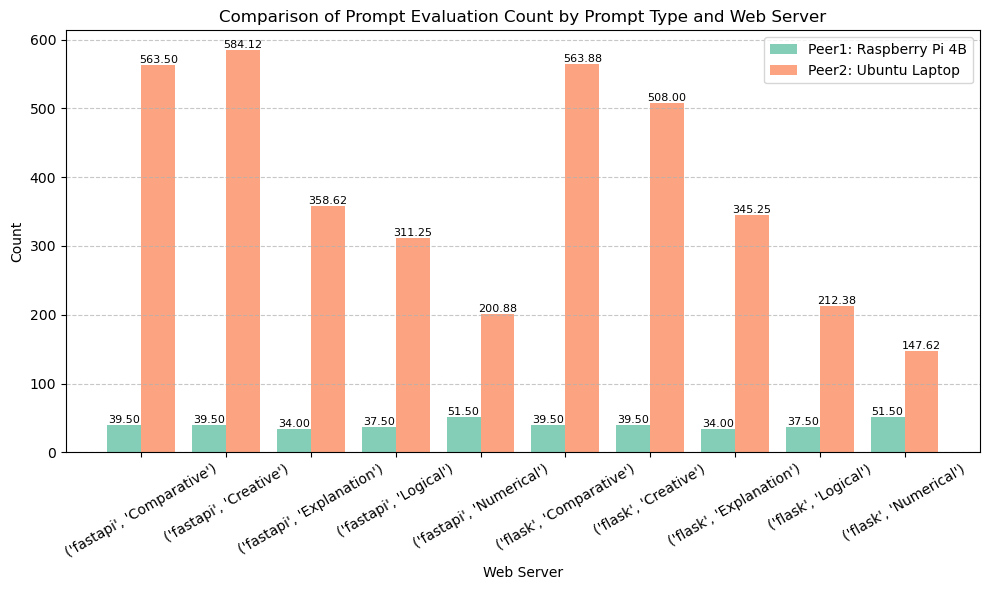

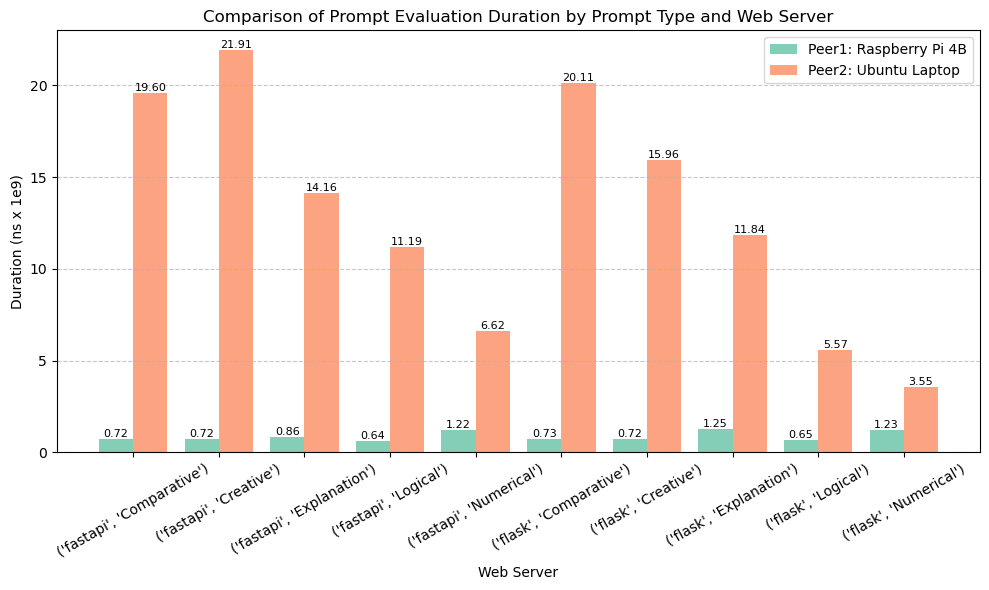

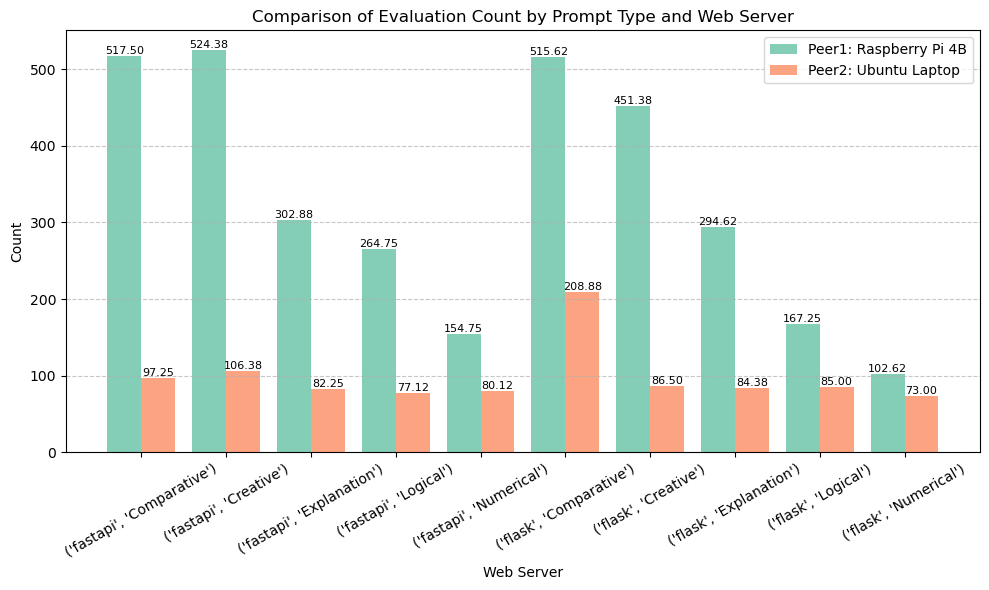

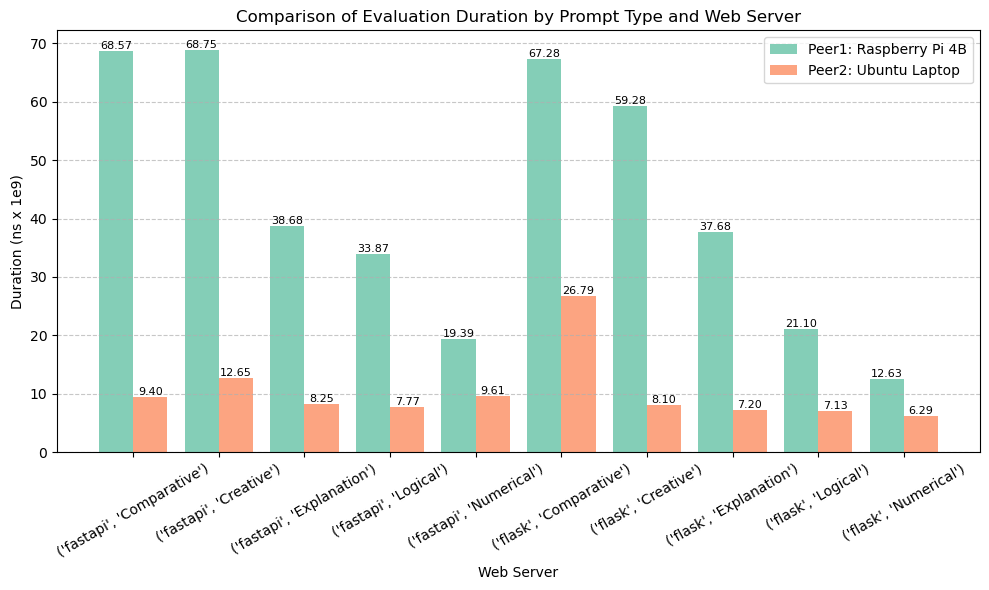

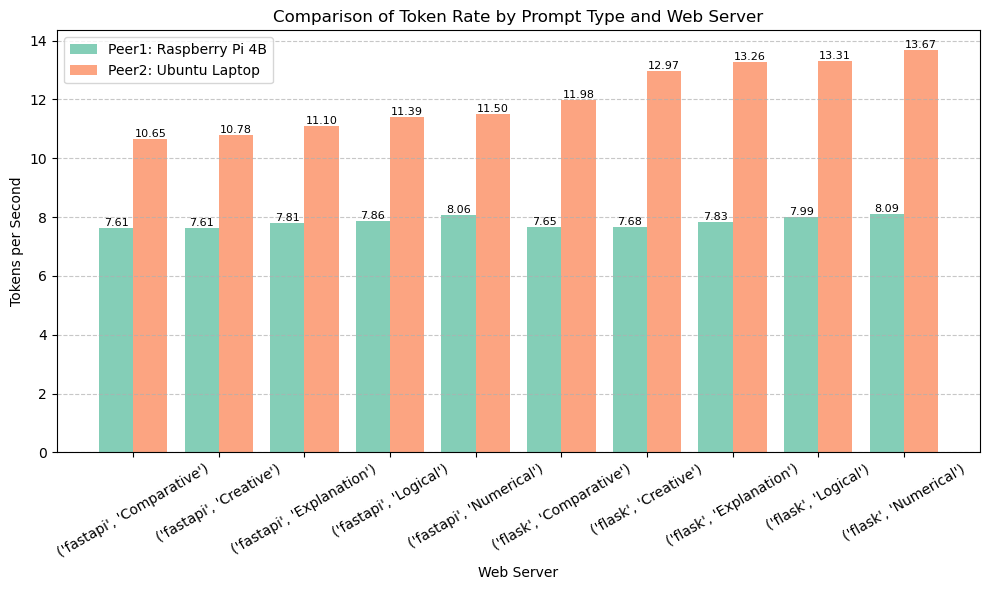

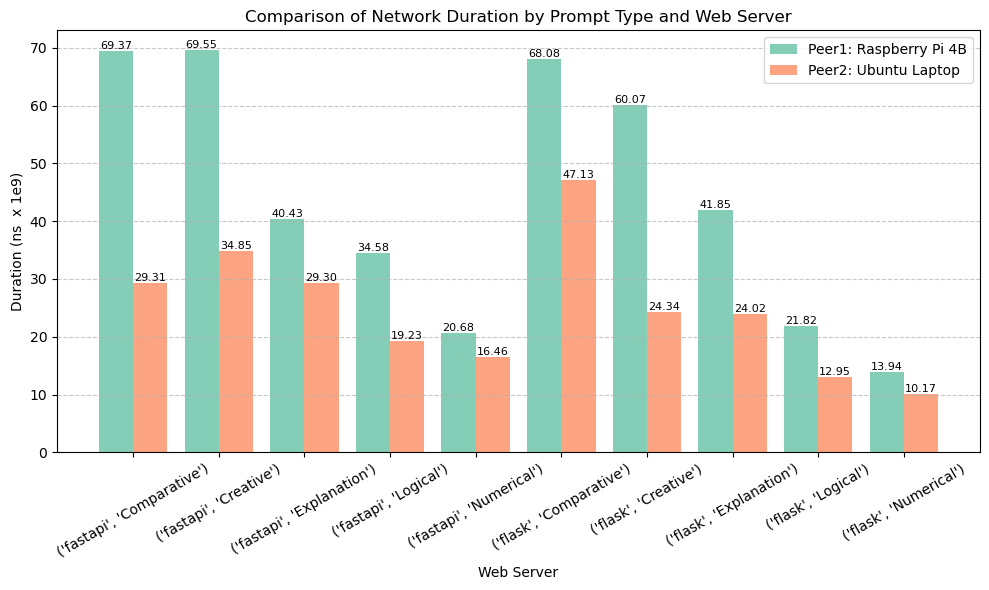

In [5]:
##### Comparison by prompt_type

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Define the columns for peer1 and peer2
peer1_columns = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration",
]

peer2_columns = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration",
]

# Define scale factors for individual metrics
scale_factors = {
    "peer1_total_duration": 1e9,  # nanoseconds to milliseconds
    "peer2_total_duration": 1e9,
    "peer1_load_duration": 1e9,
    "peer2_load_duration": 1e9,
    "peer1_prompt_eval_count": 1,  # no scaling for counts
    "peer2_prompt_eval_count": 1,
    "peer1_prompt_eval_duration": 1e9,
    "peer2_prompt_eval_duration": 1e9,
    "peer1_eval_count": 1,
    "peer2_eval_count": 1,
    "peer1_eval_duration": 1e9,
    "peer2_eval_duration": 1e9,
    "peer1_token_per_second": 1,
    "peer2_token_per_second": 1,
    "peer1_network_duration": 1e9,
    "peer2_network_duration": 1e9,
}

# Calculate averages grouped by web_server
averages_by_web_server = df.groupby(["web_server", "prompt_type"]).mean(numeric_only=True)

# Define a color palette
palette = sns.color_palette("Set2")

# Function to plot each metric
def plot_metric(peer1_col, peer2_col, title, ylabel):
    plt.figure(figsize=(10, 6))
    peer1_avg = averages_by_web_server[peer1_col] / scale_factors[peer1_col]
    peer2_avg = averages_by_web_server[peer2_col] / scale_factors[peer2_col]
    x = np.arange(len(averages_by_web_server))
    plt.bar(x - 0.2, peer1_avg, width=0.4, color=palette[0], label="Peer1: Raspberry Pi 4B", alpha=0.8)
    plt.bar(x + 0.2, peer2_avg, width=0.4, color=palette[1], label="Peer2: Ubuntu Laptop", alpha=0.8)
    for i, (p1, p2) in enumerate(zip(peer1_avg, peer2_avg)):
        plt.text(x[i] - 0.2, p1, f"{p1:.2f}", ha="center", va="bottom", fontsize=8)
        plt.text(x[i] + 0.2, p2, f"{p2:.2f}", ha="center", va="bottom", fontsize=8)
    plt.title(title)
    plt.xlabel("Web Server")
    plt.ylabel(ylabel)
    plt.xticks(x, averages_by_web_server.index, rotation=30)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot each metric
plot_metric("peer1_total_duration", "peer2_total_duration", "Comparison of Total Duration by Prompt Type and Web Server", "Duration (ns x 1e9)")
plot_metric("peer1_load_duration", "peer2_load_duration", "Comparison of Load Duration by Prompt Type and Web Server", "Duration (ns x 1e9)")
plot_metric("peer1_prompt_eval_count", "peer2_prompt_eval_count", "Comparison of Prompt Evaluation Count by Prompt Type and Web Server", "Count")
plot_metric("peer1_prompt_eval_duration", "peer2_prompt_eval_duration", "Comparison of Prompt Evaluation Duration by Prompt Type and Web Server", "Duration (ns x 1e9)")
plot_metric("peer1_eval_count", "peer2_eval_count", "Comparison of Evaluation Count by Prompt Type and Web Server", "Count")
plot_metric("peer1_eval_duration", "peer2_eval_duration", "Comparison of Evaluation Duration by Prompt Type and Web Server", "Duration (ns x 1e9)")
plot_metric("peer1_token_per_second", "peer2_token_per_second", "Comparison of Token Rate by Prompt Type and Web Server", "Tokens per Second")
plot_metric("peer1_network_duration", "peer2_network_duration", "Comparison of Network Duration by Prompt Type and Web Server", "Duration (ns  x 1e9)")


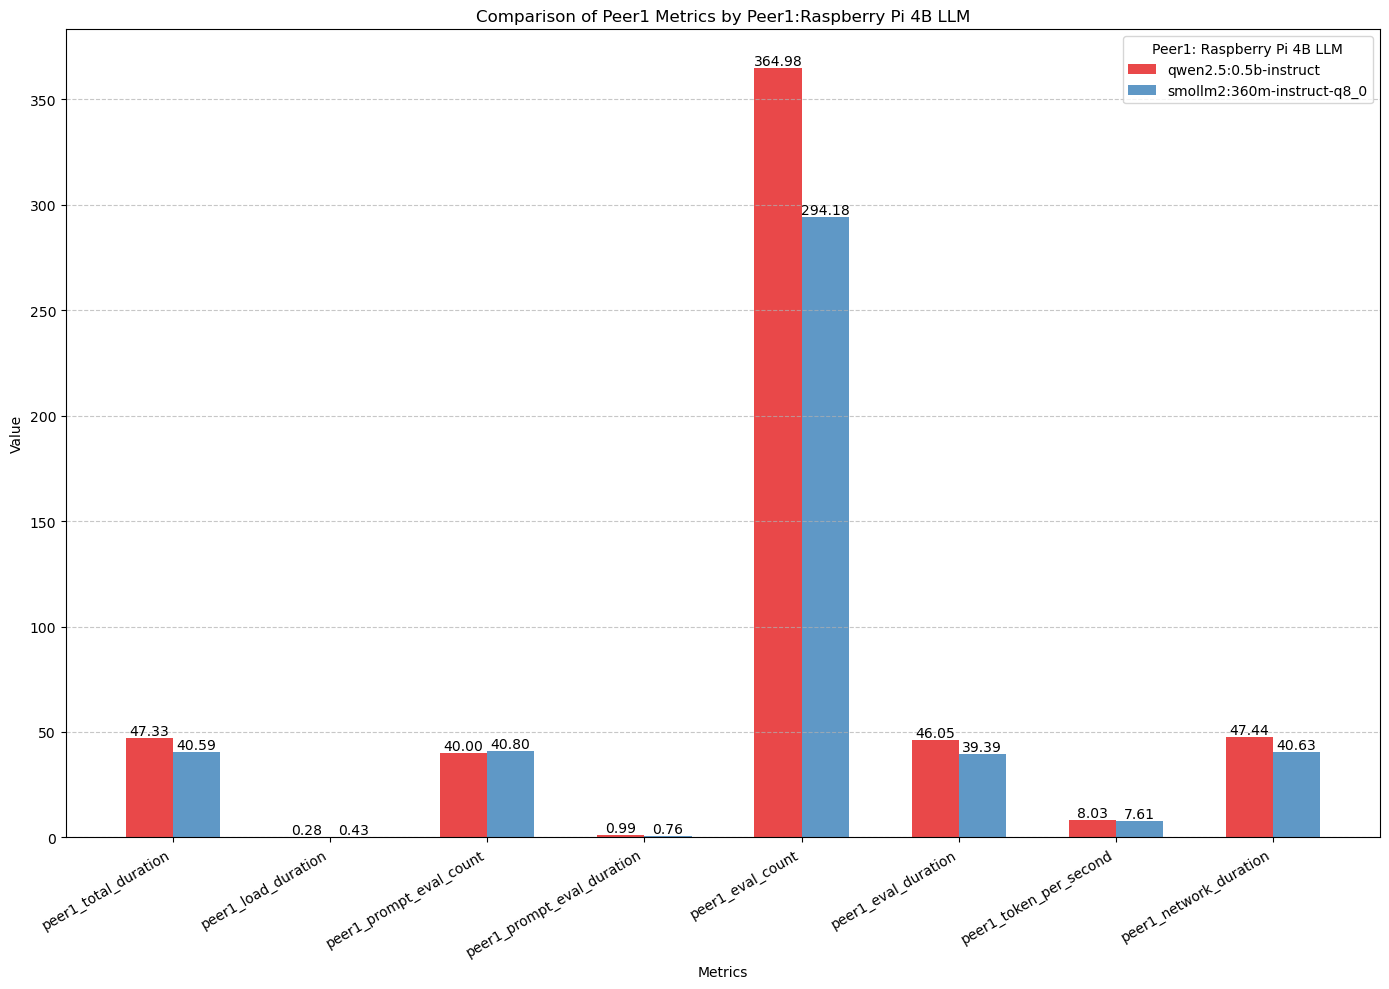

In [5]:
#Comparison of all metrics by peer1_llm 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Define the columns for peer1 and peer2
peer1_columns = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration",
]

peer2_columns = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration",
]

# Define scale factors for individual metrics
scale_factors = {
    "peer1_total_duration": 1e9,  # nanoseconds to milliseconds
    "peer2_total_duration": 1e9,
    "peer1_load_duration": 1e9,
    "peer2_load_duration": 1e9,
    "peer1_prompt_eval_count": 1,  # no scaling for counts
    "peer2_prompt_eval_count": 1,
    "peer1_prompt_eval_duration": 1e9,
    "peer2_prompt_eval_duration": 1e9,
    "peer1_eval_count": 1,
    "peer2_eval_count": 1,
    "peer1_eval_duration": 1e9,
    "peer2_eval_duration": 1e9,
    "peer1_token_per_second": 1,
    "peer2_token_per_second": 1,
    "peer1_network_duration": 1e9,
    "peer2_network_duration": 1e9,
}

# Calculate averages grouped by peer1_llm
averages_by_peer1_llm = df.groupby("peer1_llm").mean(numeric_only=True)

# Define a color palette
palette = sns.color_palette("Set1")

# Plot side-by-side bars for each metric, grouped by Peer1 LLM
def plot_metrics_side_by_side(grouped_data, columns, title, ylabel):
    bar_width = 0.3
    x = np.arange(len(columns))  # Position for each metric

    plt.figure(figsize=(14, 10))
    for i, llm in enumerate(grouped_data.index):
        offset = i * bar_width  # Offset for each LLM
        values = [grouped_data.loc[llm, col] / scale_factors[col] for col in columns]
        plt.bar(x + offset, values, bar_width, label=f"{llm}", alpha=0.8, color=palette[i])
        for j, value in enumerate(values):
            plt.text(x[j] + offset, value, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

    plt.title(title)
    plt.xlabel("Metrics")
    plt.ylabel(ylabel)
    plt.xticks(x + bar_width * (len(grouped_data.index) - 1) / 2, columns, rotation=30, ha="right")
    plt.legend(title="Peer1: Raspberry Pi 4B LLM")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot all Peer1 metrics side by side for each Peer1 LLM
plot_metrics_side_by_side(averages_by_peer1_llm, peer1_columns, "Comparison of Peer1 Metrics by Peer1:Raspberry Pi 4B LLM", "Value")


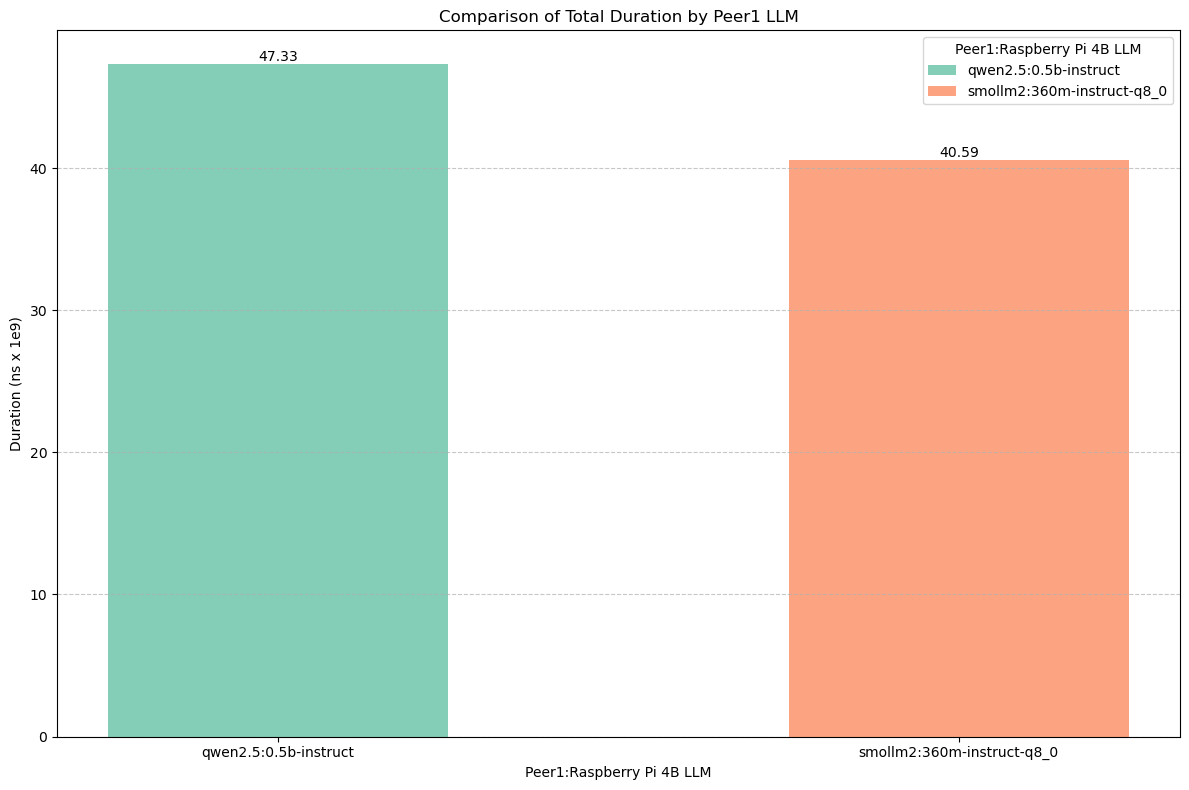

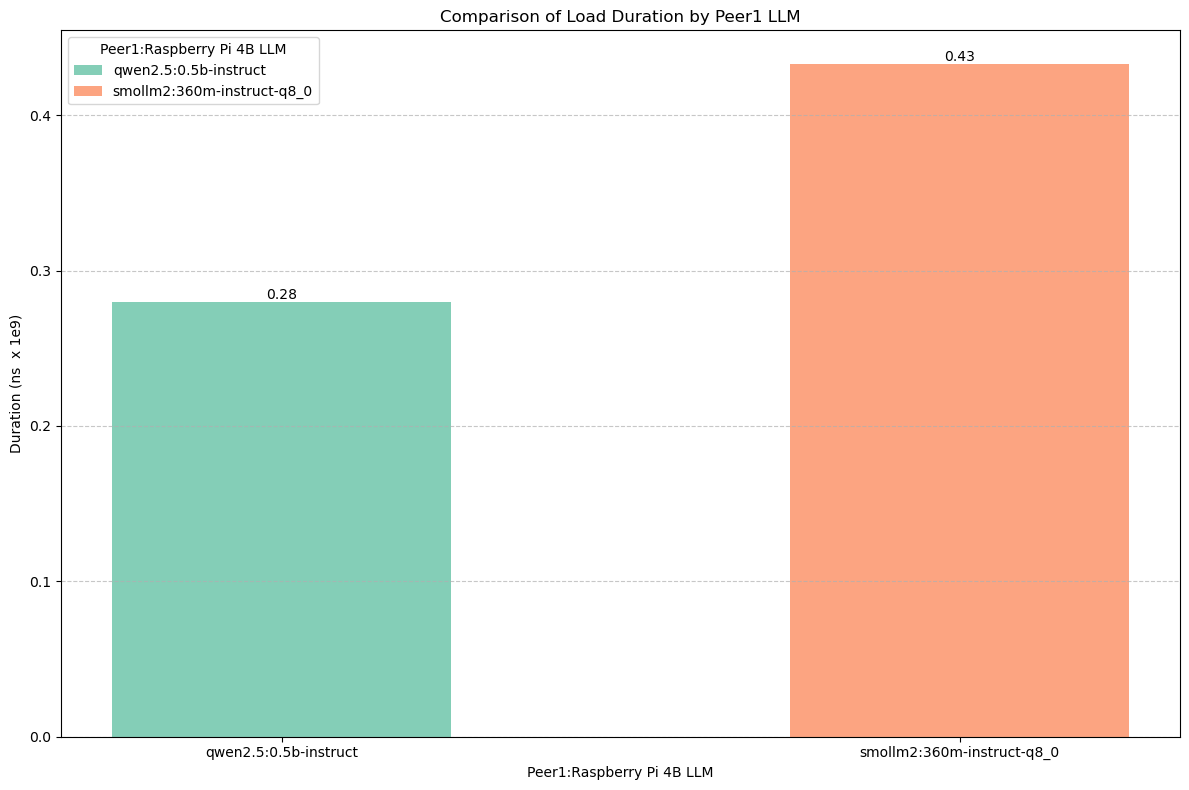

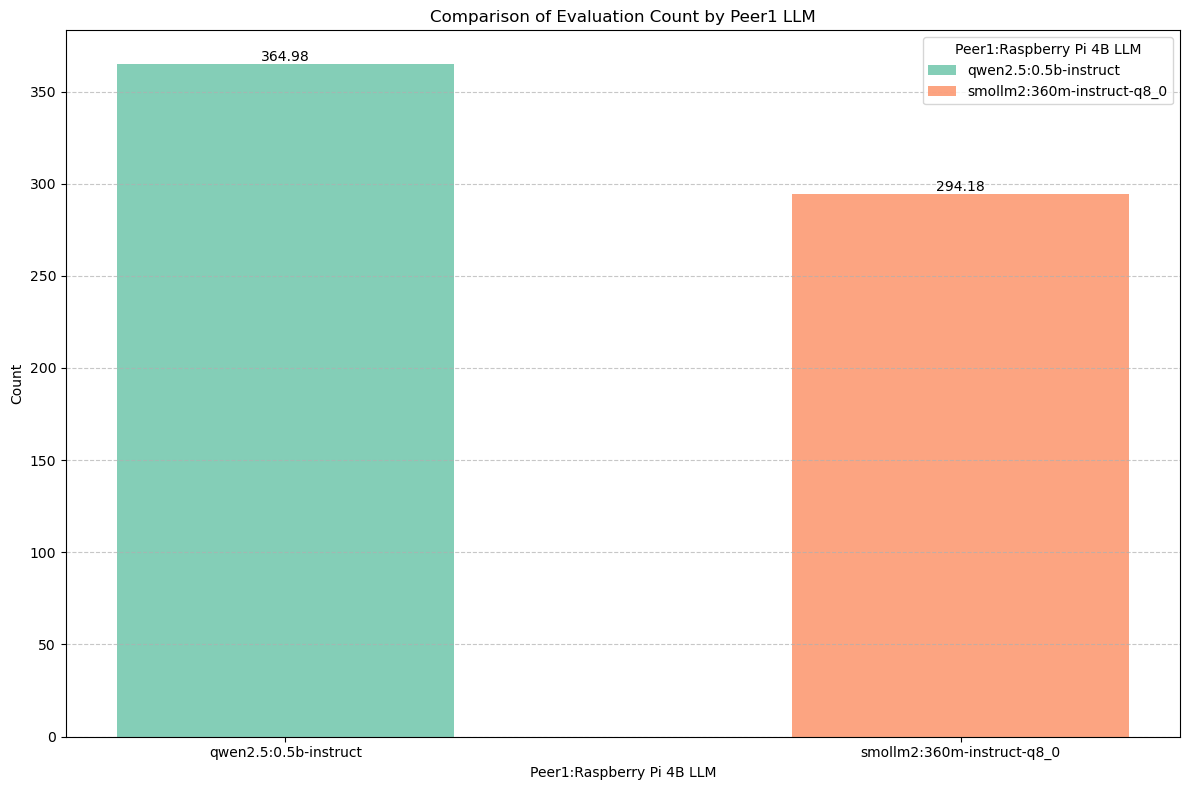

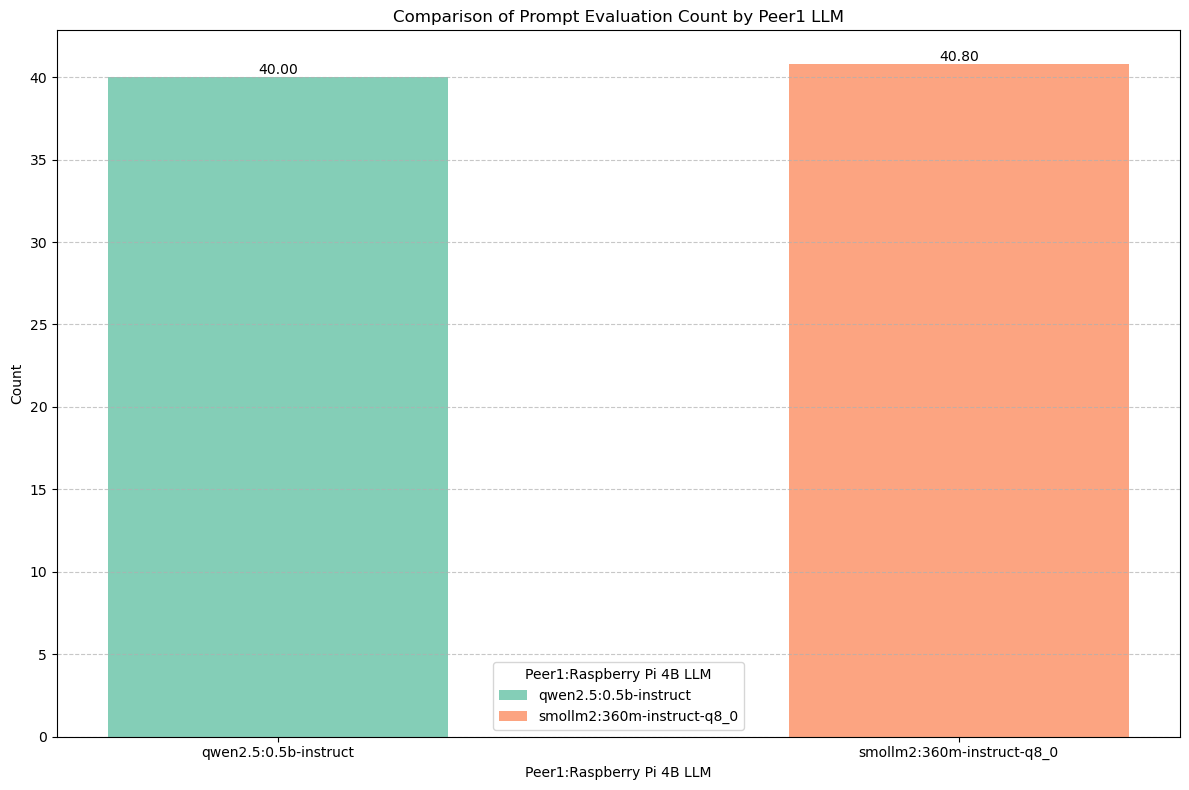

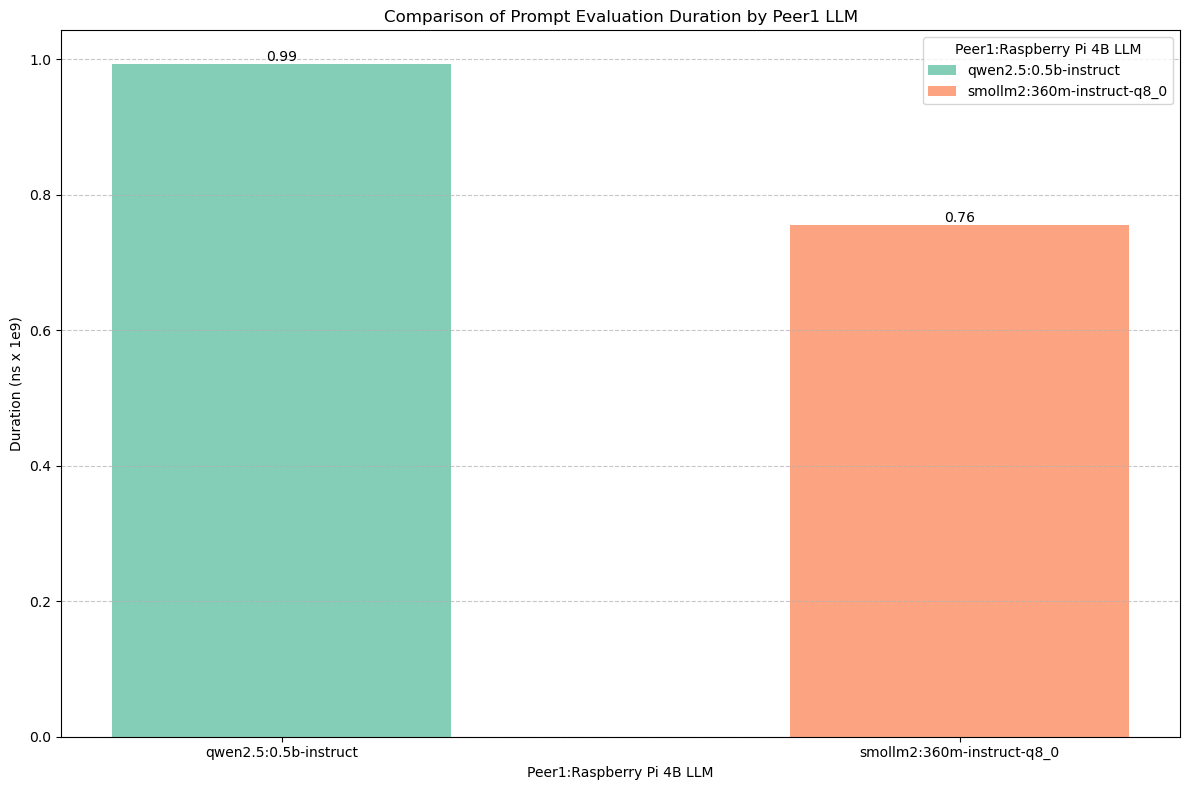

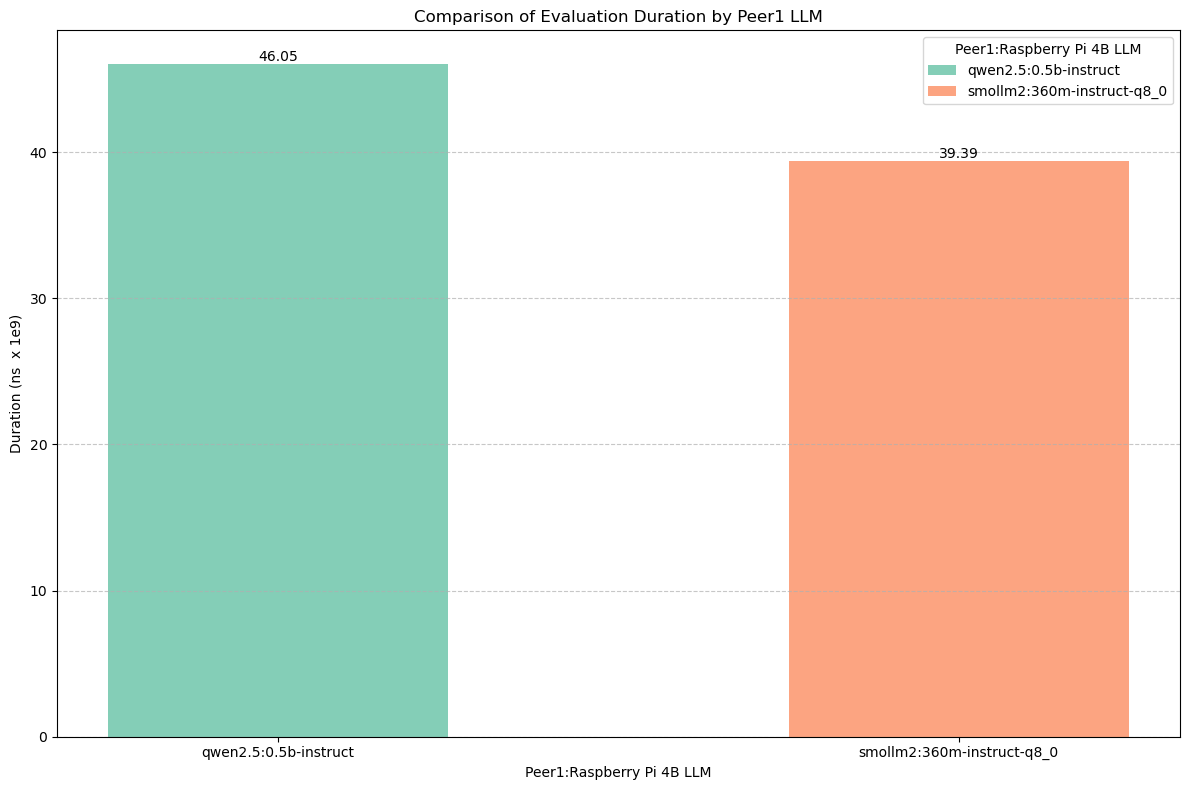

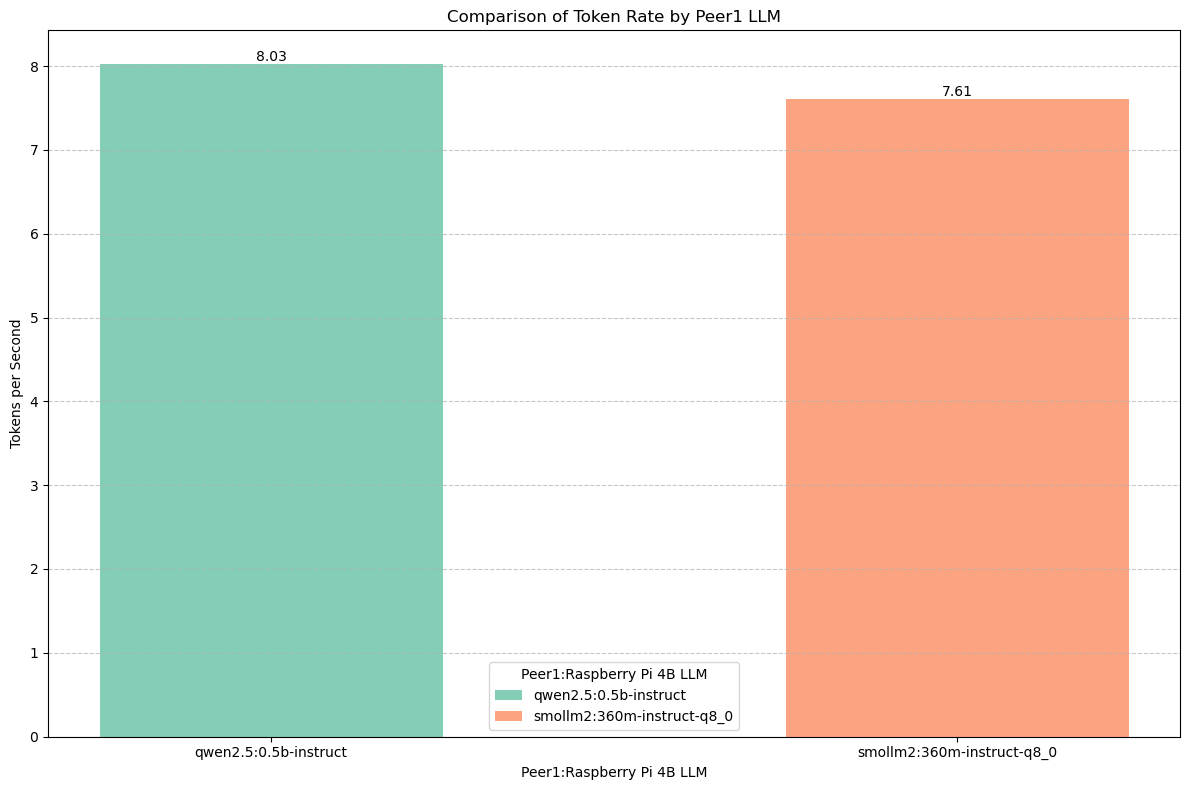

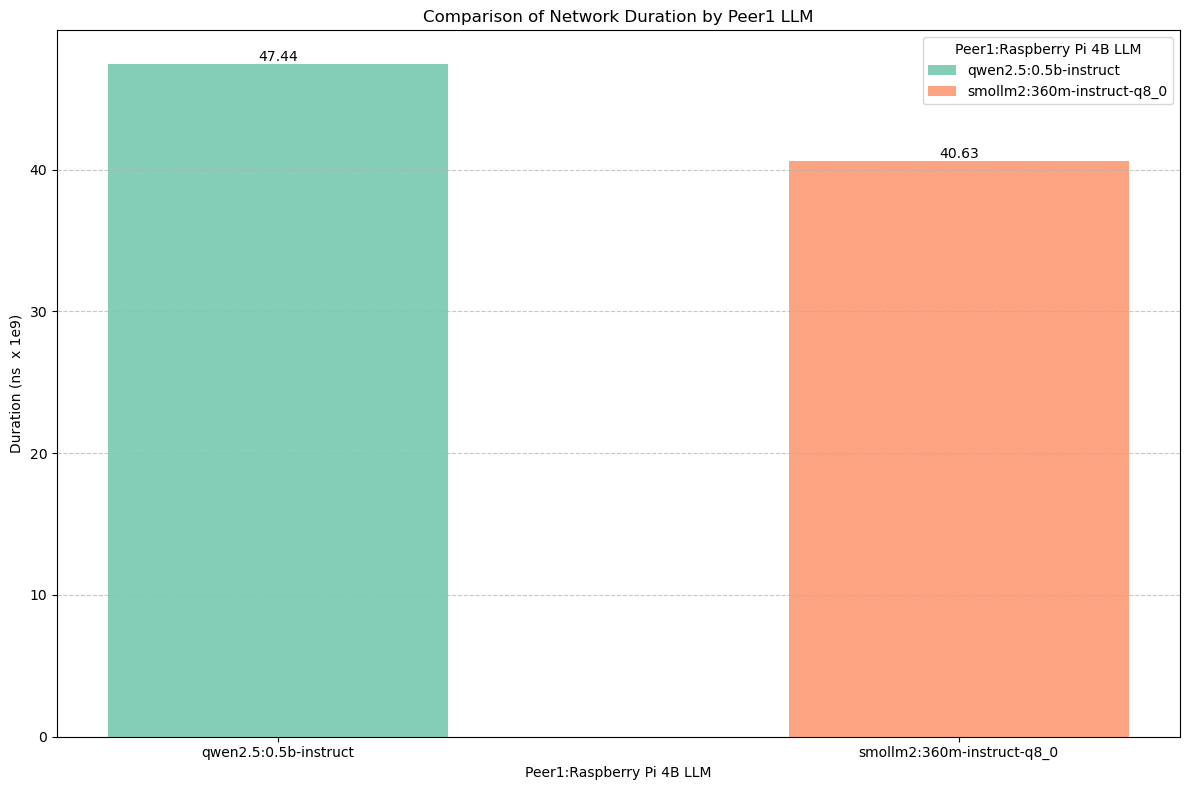

In [6]:
#### Above is same as this but with seperate codes

#Comparison of all metrics seperately by peer1_llm 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Define the columns for peer1 and peer2
peer1_columns = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration",
]

peer2_columns = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration",
]

# Define scale factors for individual metrics
scale_factors = {
    "peer1_total_duration": 1e9,  # nanoseconds to milliseconds
    "peer2_total_duration": 1e9,
    "peer1_load_duration": 1e9,
    "peer2_load_duration": 1e9,
    "peer1_prompt_eval_count": 1,  # no scaling for counts
    "peer2_prompt_eval_count": 1,
    "peer1_prompt_eval_duration": 1e9,
    "peer2_prompt_eval_duration": 1e9,
    "peer1_eval_count": 1,
    "peer2_eval_count": 1,
    "peer1_eval_duration": 1e9,
    "peer2_eval_duration": 1e9,
    "peer1_token_per_second": 1,
    "peer2_token_per_second": 1,
    "peer1_network_duration": 1e9,
    "peer2_network_duration": 1e9,
}

# Calculate averages grouped by peer1_llm
averages_by_peer1_llm = df.groupby("peer1_llm").mean(numeric_only=True)

# Define a color palette
palette = sns.color_palette("Set2", len(averages_by_peer1_llm))

# Plot comparison of a single metric for each Peer1 LLM with distinct colors
# Updated plot_single_metric function
def plot_single_metric(grouped_data, column, title, ylabel):
    bar_width = 0.5
    x = np.arange(len(grouped_data))  # Position for each Peer1 LLM

    plt.figure(figsize=(12, 8))
    values = [grouped_data.loc[llm, column] / scale_factors[column] for llm in grouped_data.index]

    for i, (llm, value) in enumerate(zip(grouped_data.index, values)):
        plt.bar(x[i], value, width=bar_width, label=llm, color=palette[i], alpha=0.8)
        plt.text(x[i], value, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

    plt.title(title)
    plt.xlabel("Peer1:Raspberry Pi 4B LLM")
    plt.ylabel(ylabel)
    plt.xticks(x, grouped_data.index, rotation=0, ha="center")  # Center x-ticks
    plt.legend(title="Peer1:Raspberry Pi 4B LLM")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_single_metric(averages_by_peer1_llm, "peer1_total_duration", "Comparison of Total Duration by Peer1 LLM", "Duration (ns x 1e9)")

plot_single_metric(averages_by_peer1_llm, "peer1_load_duration", "Comparison of Load Duration by Peer1 LLM", "Duration (ns  x 1e9)")


plot_single_metric(averages_by_peer1_llm, "peer1_eval_count", "Comparison of Evaluation Count by Peer1 LLM", "Count")

plot_single_metric(averages_by_peer1_llm, "peer1_prompt_eval_count", "Comparison of Prompt Evaluation Count by Peer1 LLM", "Count")

plot_single_metric(averages_by_peer1_llm, "peer1_prompt_eval_duration", "Comparison of Prompt Evaluation Duration by Peer1 LLM", "Duration (ns x 1e9)")

plot_single_metric(averages_by_peer1_llm, "peer1_eval_duration", "Comparison of Evaluation Duration by Peer1 LLM", "Duration (ns  x 1e9)")

plot_single_metric(averages_by_peer1_llm, "peer1_token_per_second", "Comparison of Token Rate by Peer1 LLM", "Tokens per Second")

plot_single_metric(averages_by_peer1_llm, "peer1_network_duration", "Comparison of Network Duration by Peer1 LLM", "Duration (ns  x 1e9)")



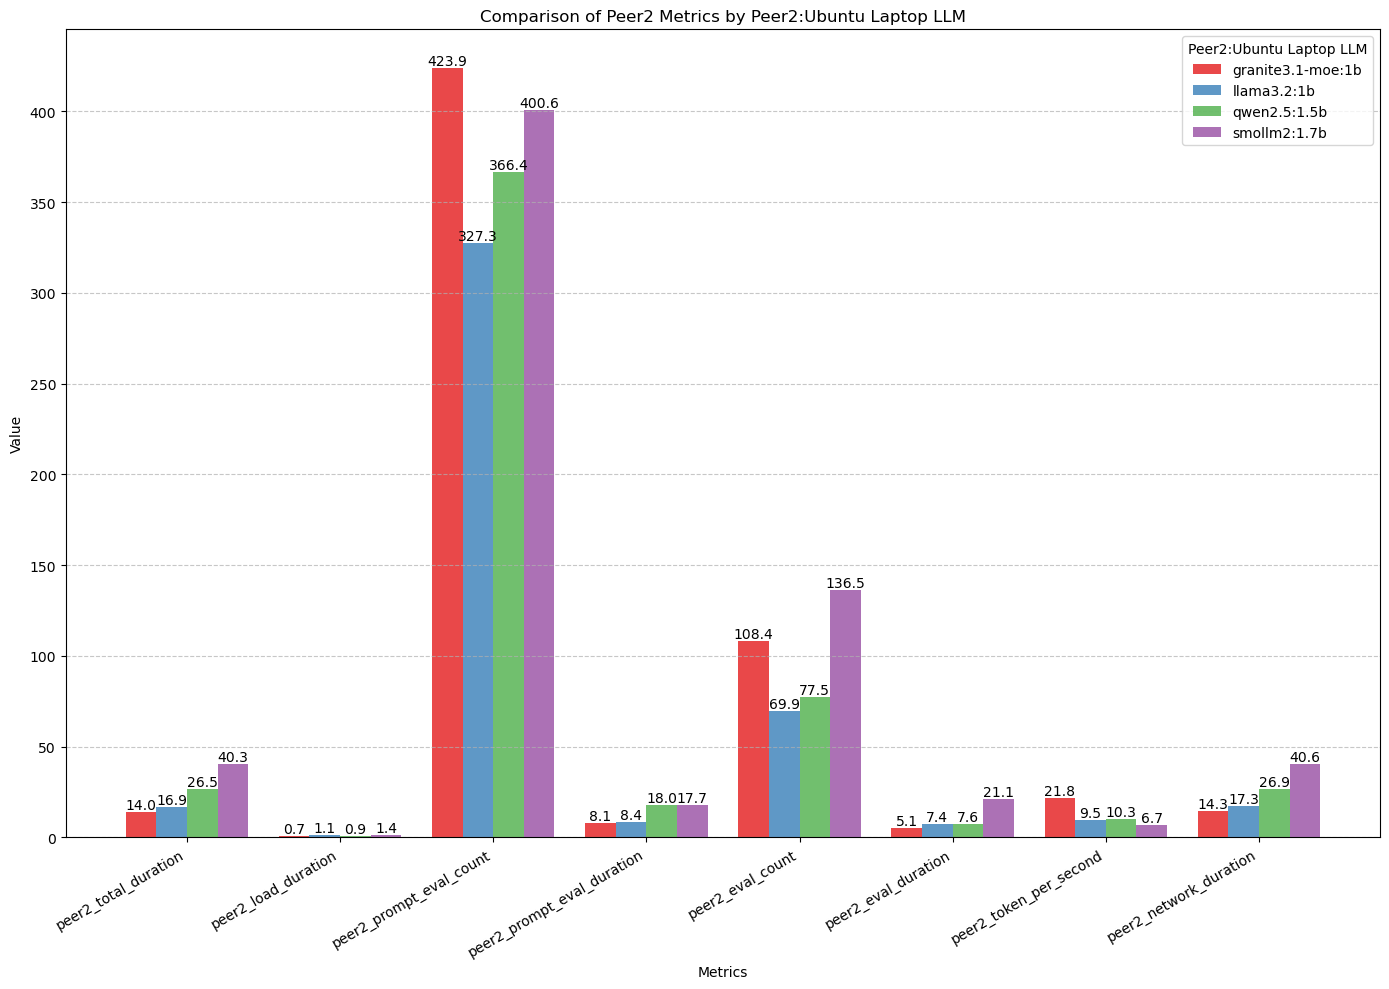

In [7]:
#Comparison of all metrics by peer2_llm 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Define the columns for peer1 and peer2
peer1_columns = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration",
]

peer2_columns = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration",
]

# Define scale factors for individual metrics
scale_factors = {
    "peer1_total_duration": 1e9,  # nanoseconds to milliseconds
    "peer2_total_duration": 1e9,
    "peer1_load_duration": 1e9,
    "peer2_load_duration": 1e9,
    "peer1_prompt_eval_count": 1,  # no scaling for counts
    "peer2_prompt_eval_count": 1,
    "peer1_prompt_eval_duration": 1e9,
    "peer2_prompt_eval_duration": 1e9,
    "peer1_eval_count": 1,
    "peer2_eval_count": 1,
    "peer1_eval_duration": 1e9,
    "peer2_eval_duration": 1e9,
    "peer1_token_per_second": 1,
    "peer2_token_per_second": 1,
    "peer1_network_duration": 1e9,
    "peer2_network_duration": 1e9,
}

# Calculate averages grouped by peer1_llm
averages_by_peer2_llm = df.groupby("peer2_llm").mean(numeric_only=True)

# Define a color palette
palette = sns.color_palette("Set1")

# Plot side-by-side bars for each metric, grouped by Peer1 LLM
# Plot side-by-side bars for each metric, grouped by Peer2 LLM
def plot_metrics_side_by_side(grouped_data, columns, title, ylabel):
    bar_width = 0.2  # Adjusted for more metrics
    num_llms = len(grouped_data.index)
    x = np.arange(len(columns))  # Position for each metric

    plt.figure(figsize=(14, 10))
    for i, llm in enumerate(grouped_data.index):
        offset = i * bar_width  # Offset for each LLM
        values = [grouped_data.loc[llm, col] / scale_factors[col] for col in columns]
        plt.bar(x + offset, values, bar_width, label=f"{llm}", alpha=0.8, color=palette[i])
        for j, value in enumerate(values):
            plt.text(x[j] + offset, value, f"{value:.1f}", ha="center", va="bottom", fontsize=10)

    # Adjust x-tick positions to the center of the group of bars for each metric
    plt.title(title)
    plt.xlabel("Metrics")
    plt.ylabel(ylabel)
    # Center the x-tick labels over the group of bars
    plt.xticks(x + bar_width * (num_llms - 1) / 2, columns, rotation=30, ha="right")
    plt.legend(title="Peer2:Ubuntu Laptop LLM")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot all Peer1 metrics side by side for each Peer2 LLM
plot_metrics_side_by_side(averages_by_peer2_llm, peer2_columns, "Comparison of Peer2 Metrics by Peer2:Ubuntu Laptop LLM", "Value")



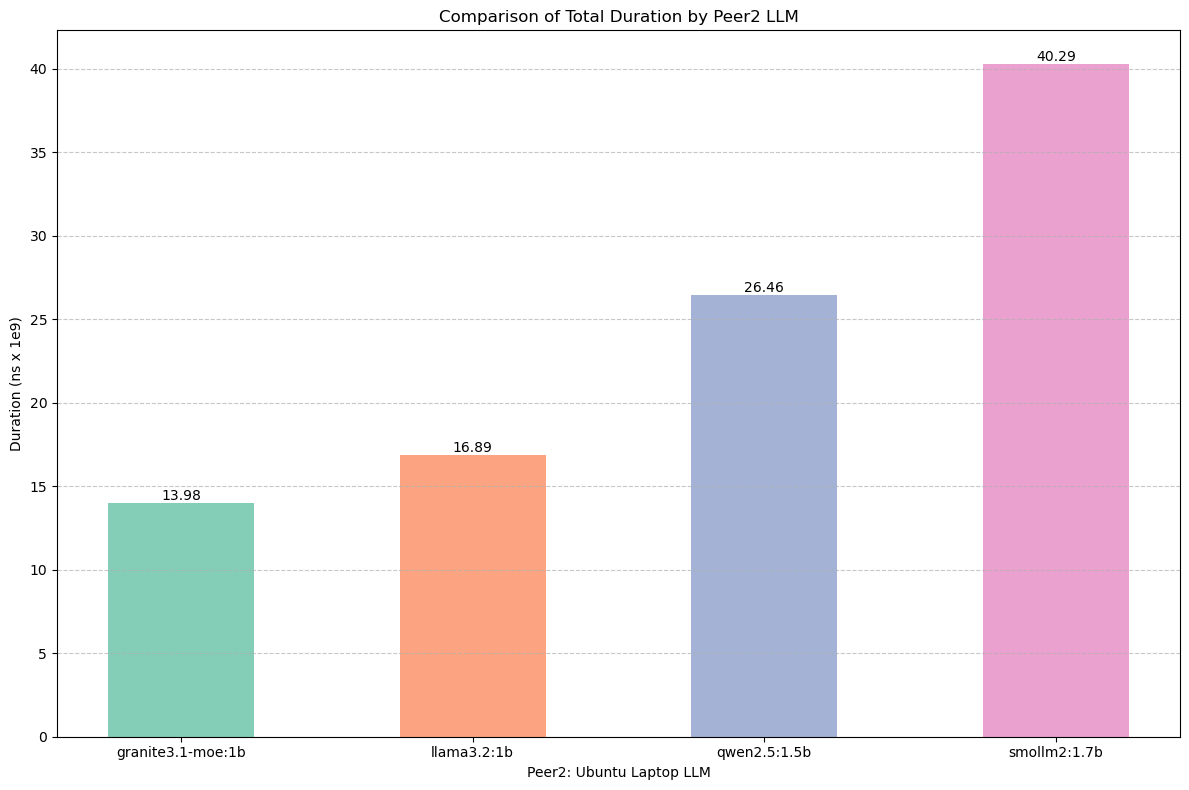

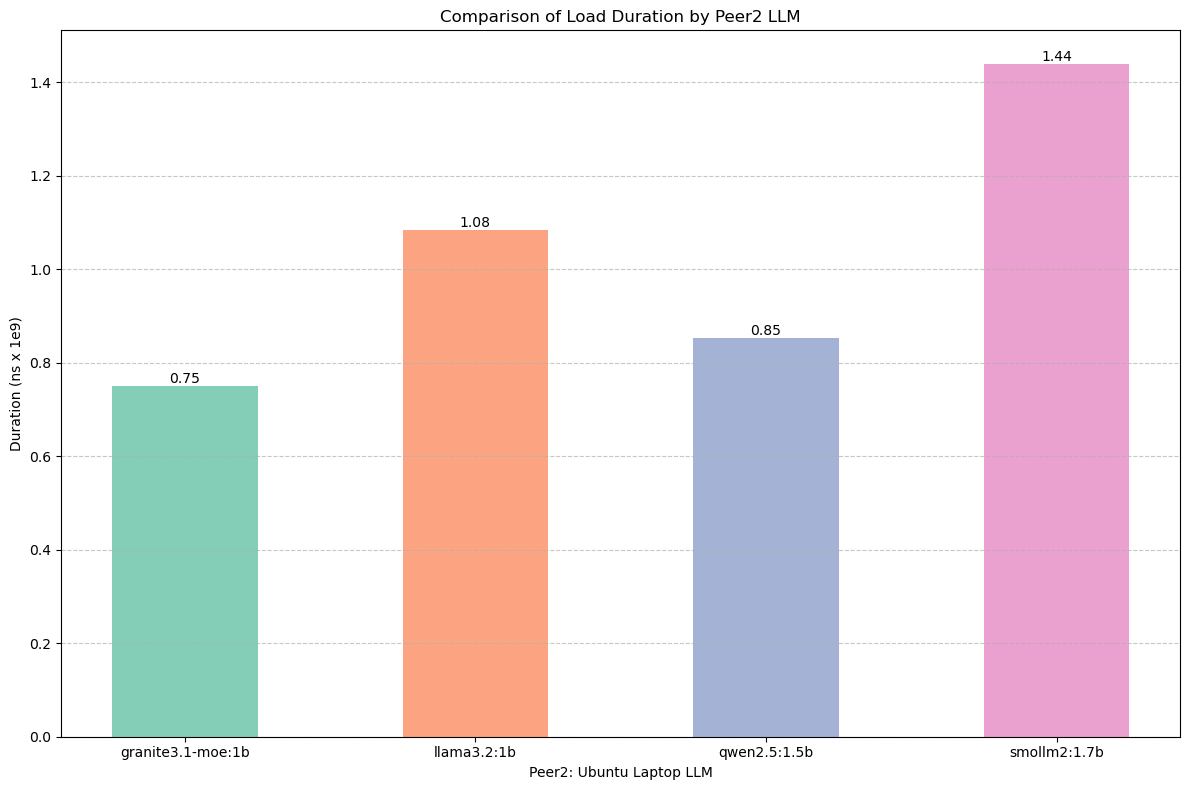

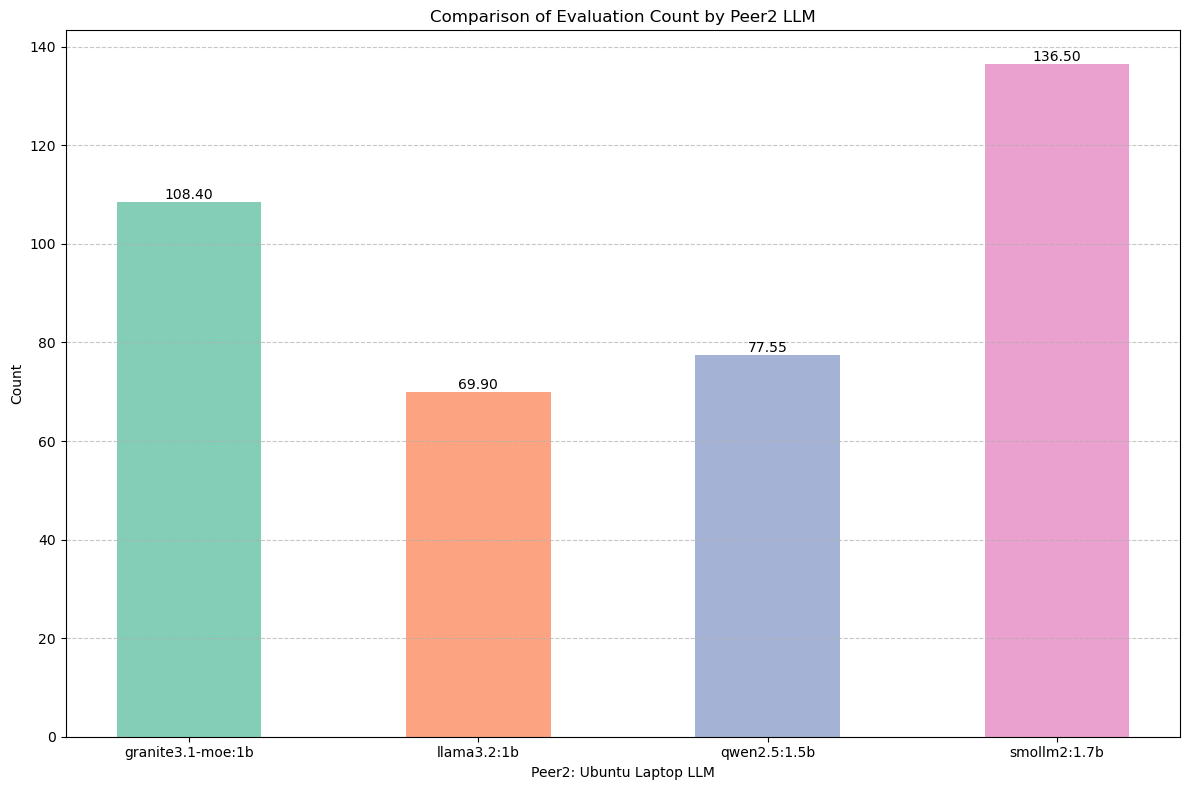

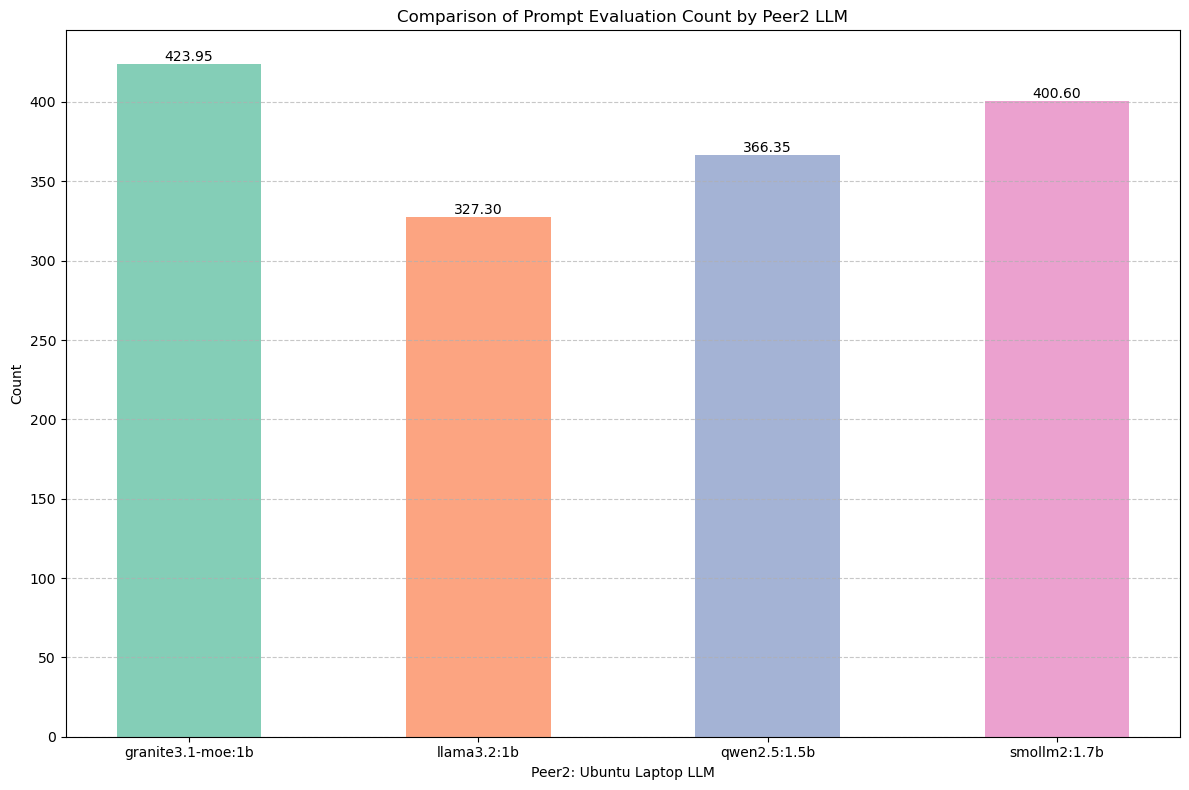

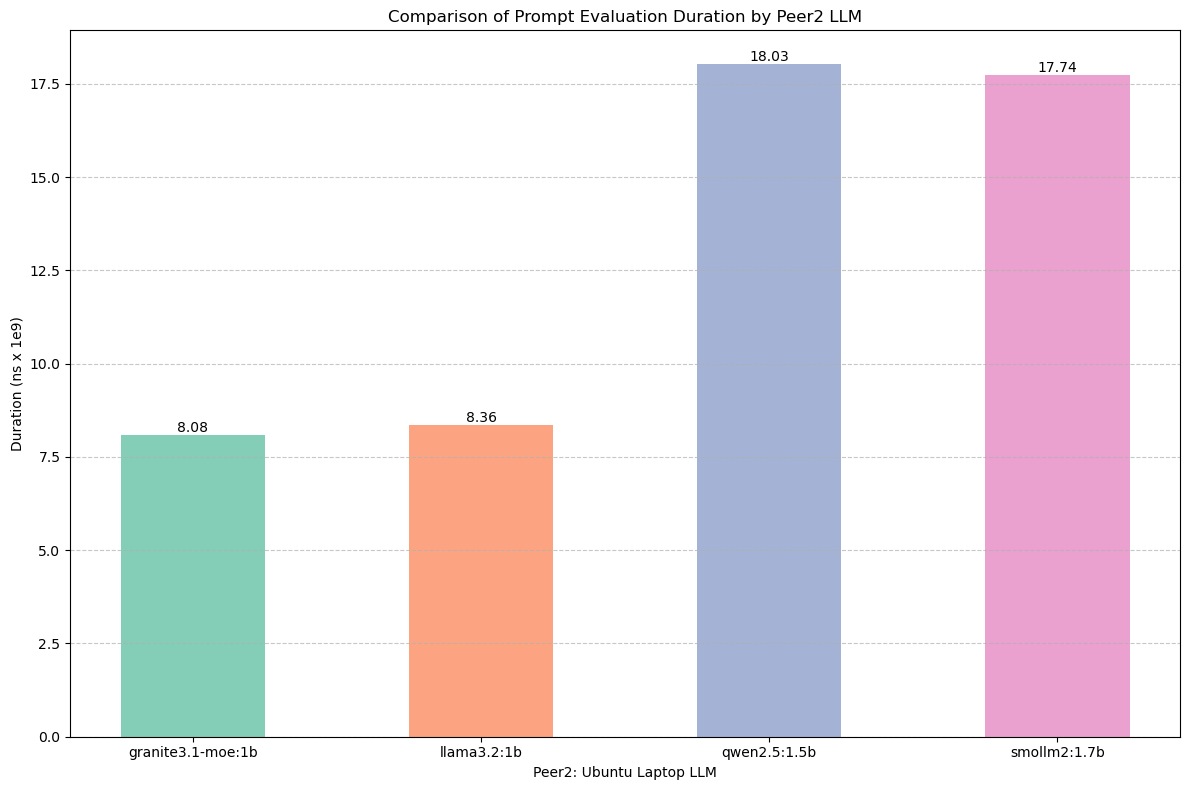

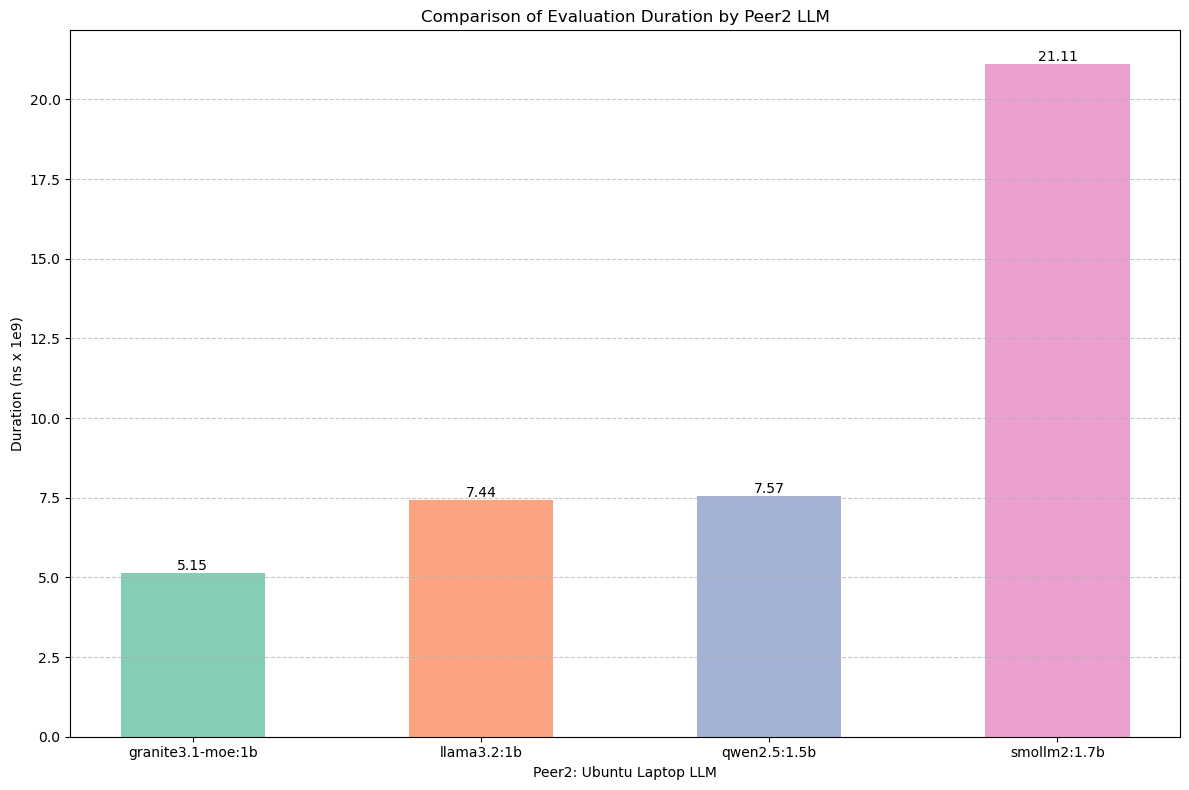

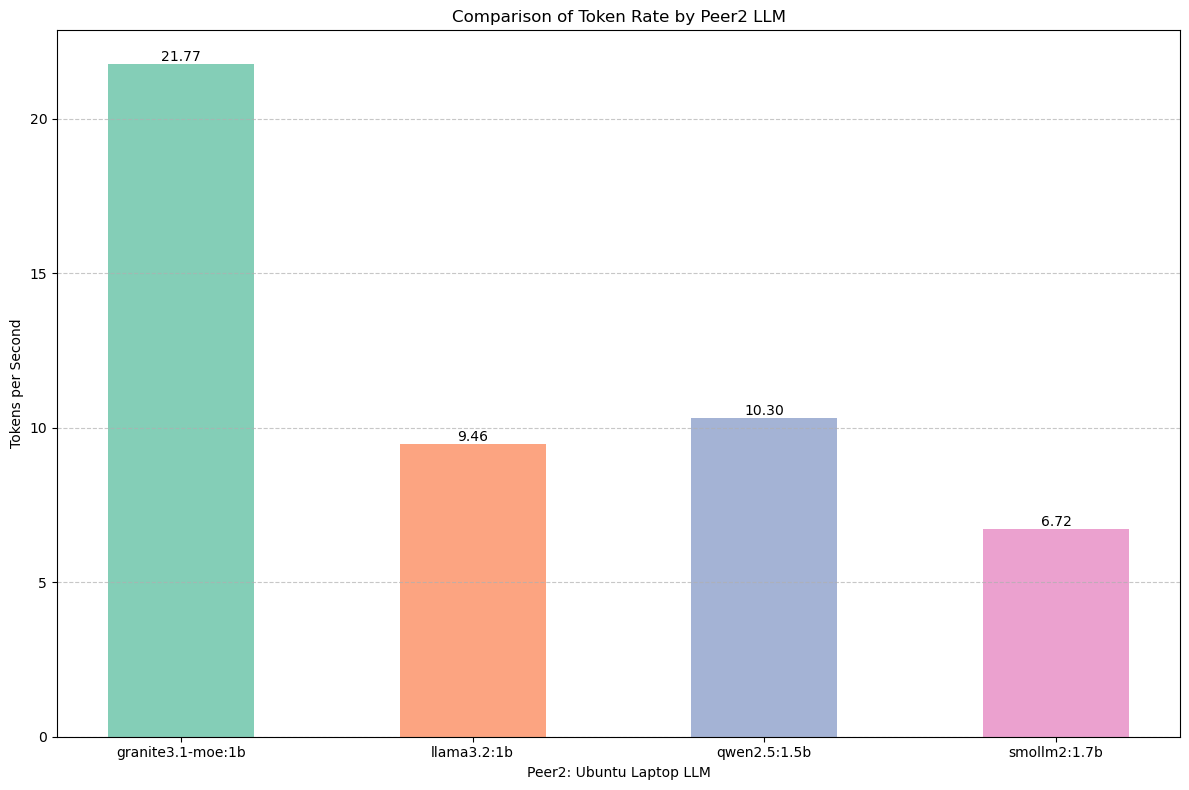

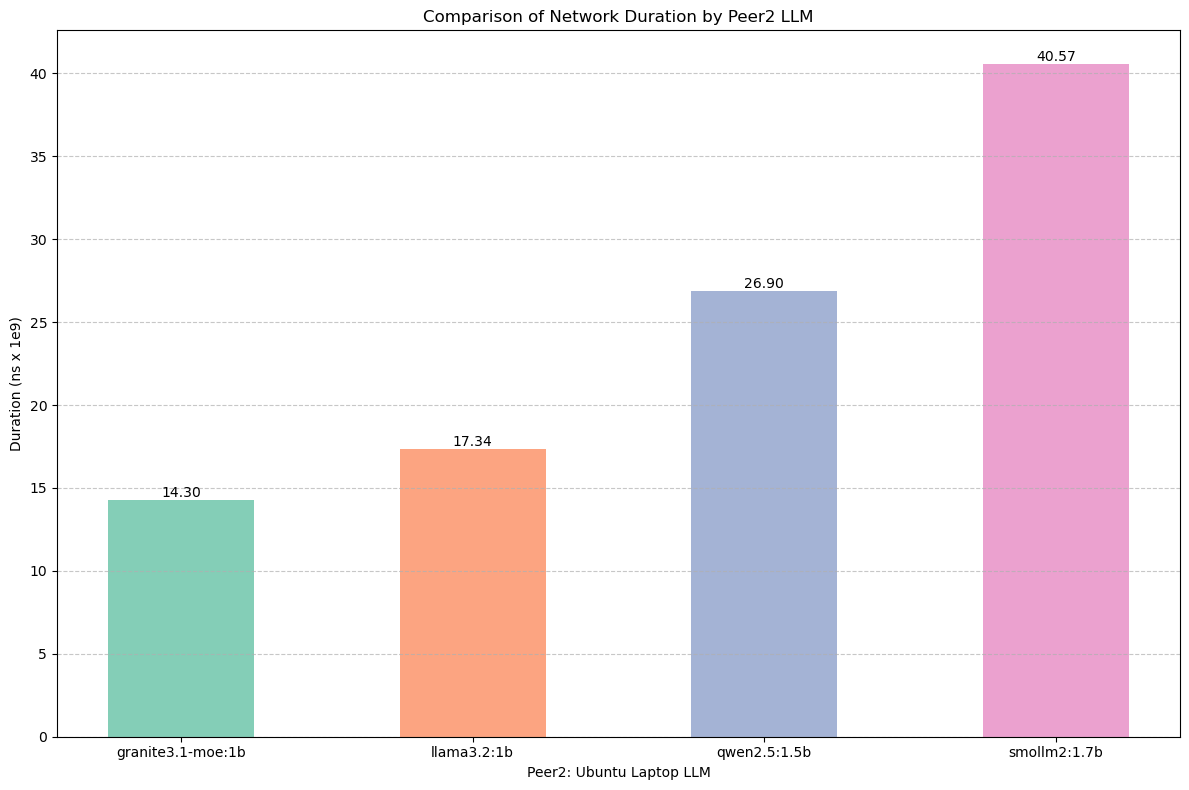

In [5]:
#### Above is same as this but with seperate codes

#Comparison of all metrics seperately by peer2_llm 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Define the columns for peer1 and peer2
peer1_columns = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration",
]

peer2_columns = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration",
]

# Define scale factors for individual metrics
scale_factors = {
    "peer1_total_duration": 1e9,  # nanoseconds to milliseconds
    "peer2_total_duration": 1e9,
    "peer1_load_duration": 1e9,
    "peer2_load_duration": 1e9,
    "peer1_prompt_eval_count": 1,  # no scaling for counts
    "peer2_prompt_eval_count": 1,
    "peer1_prompt_eval_duration": 1e9,
    "peer2_prompt_eval_duration": 1e9,
    "peer1_eval_count": 1,
    "peer2_eval_count": 1,
    "peer1_eval_duration": 1e9,
    "peer2_eval_duration": 1e9,
    "peer1_token_per_second": 1,
    "peer2_token_per_second": 1,
    "peer1_network_duration": 1e9,
    "peer2_network_duration": 1e9,
}

# Calculate averages grouped by peer2_llm
averages_by_peer2_llm = df.groupby("peer2_llm").mean(numeric_only=True)

# Define a color palette
palette = sns.color_palette("Set2", len(averages_by_peer2_llm))

# Plot comparison of a single metric for each Peer2 LLM with distinct colors
def plot_single_metric(grouped_data, column, title, ylabel):
    bar_width = 0.5
    x = np.arange(len(grouped_data))  # Position for each Peer2 LLM

    plt.figure(figsize=(12, 8))
    values = [grouped_data.loc[llm, column] / scale_factors[column] for llm in grouped_data.index]

    bars = plt.bar(x, values, width=bar_width, color=palette[:len(grouped_data)], alpha=0.8)
    for i, (llm, value) in enumerate(zip(grouped_data.index, values)):
        plt.text(x[i], value, f"{value:.2f}", ha="center", va="bottom", fontsize=10)

    # Centering x-ticks
    plt.xticks(x, grouped_data.index, rotation=0, ha="center")
    plt.title(title)
    plt.xlabel("Peer2: Ubuntu Laptop LLM")
    plt.ylabel(ylabel)
    #plt.legend(bars, grouped_data.index, title="Peer2: Ubuntu Laptop LLM", loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example: Plot single metric comparison for "peer2_total_duration"
plot_single_metric(averages_by_peer2_llm, "peer2_total_duration", "Comparison of Total Duration by Peer2 LLM", "Duration (ns x 1e9)")

plot_single_metric(averages_by_peer2_llm, "peer2_load_duration", "Comparison of Load Duration by Peer2 LLM", "Duration (ns x 1e9)")


# Example: Plot single metric comparison for "peer2_eval_count"
plot_single_metric(averages_by_peer2_llm, "peer2_eval_count", "Comparison of Evaluation Count by Peer2 LLM", "Count")

# Example: Plot single metric comparison for "peer2_prompt_eval_count"
plot_single_metric(averages_by_peer2_llm, "peer2_prompt_eval_count", "Comparison of Prompt Evaluation Count by Peer2 LLM", "Count")

# Example: Plot single metric comparison for "peer2_prompt_eval_duration"
plot_single_metric(averages_by_peer2_llm, "peer2_prompt_eval_duration", "Comparison of Prompt Evaluation Duration by Peer2 LLM", "Duration (ns x 1e9)")

# Example: Plot single metric comparison for "peer2_eval_duration"
plot_single_metric(averages_by_peer2_llm, "peer2_eval_duration", "Comparison of Evaluation Duration by Peer2 LLM", "Duration (ns x 1e9)")

# Example: Plot single metric comparison for "peer2_token_per_second"
plot_single_metric(averages_by_peer2_llm, "peer2_token_per_second", "Comparison of Token Rate by Peer2 LLM", "Tokens per Second")

# Example: Plot single metric comparison for "peer2_network_duration"
plot_single_metric(averages_by_peer2_llm, "peer2_network_duration", "Comparison of Network Duration by Peer2 LLM", "Duration (ns x 1e9)")





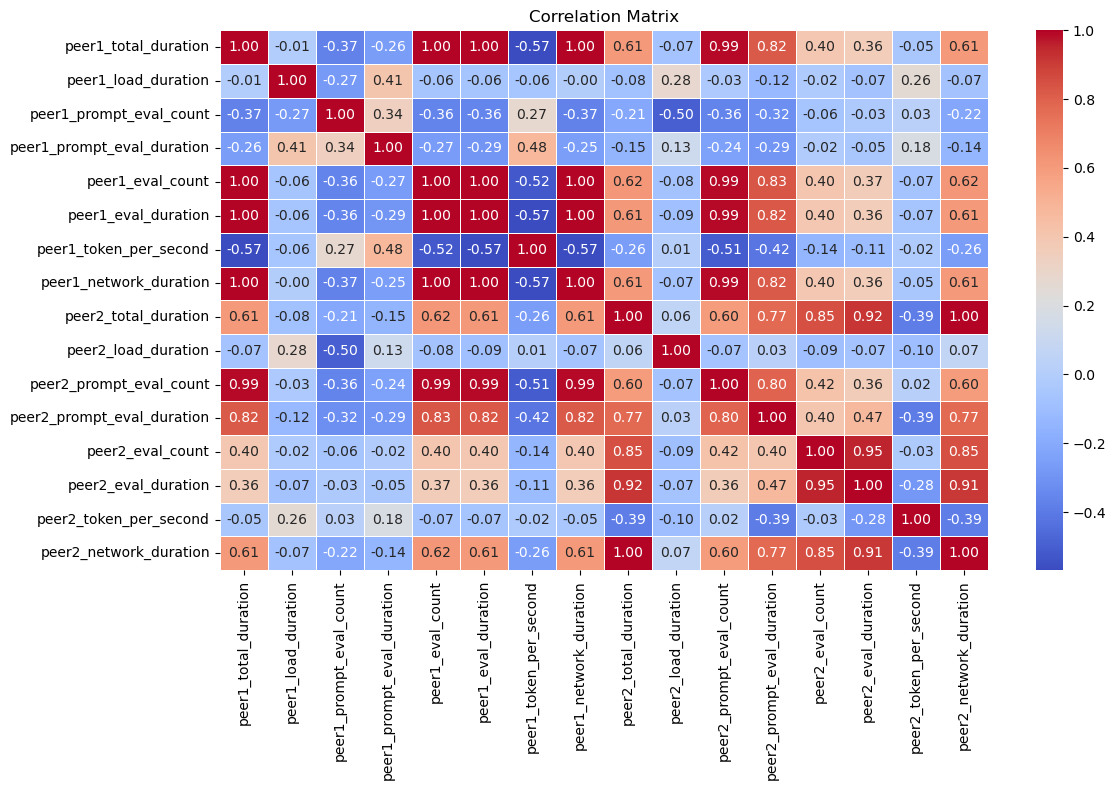

In [9]:
# Correlation matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop specified columns
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt",
    "web_server"
]

# Create a filtered DataFrame and compute the correlation matrix
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')
correlation_matrix = filtered_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


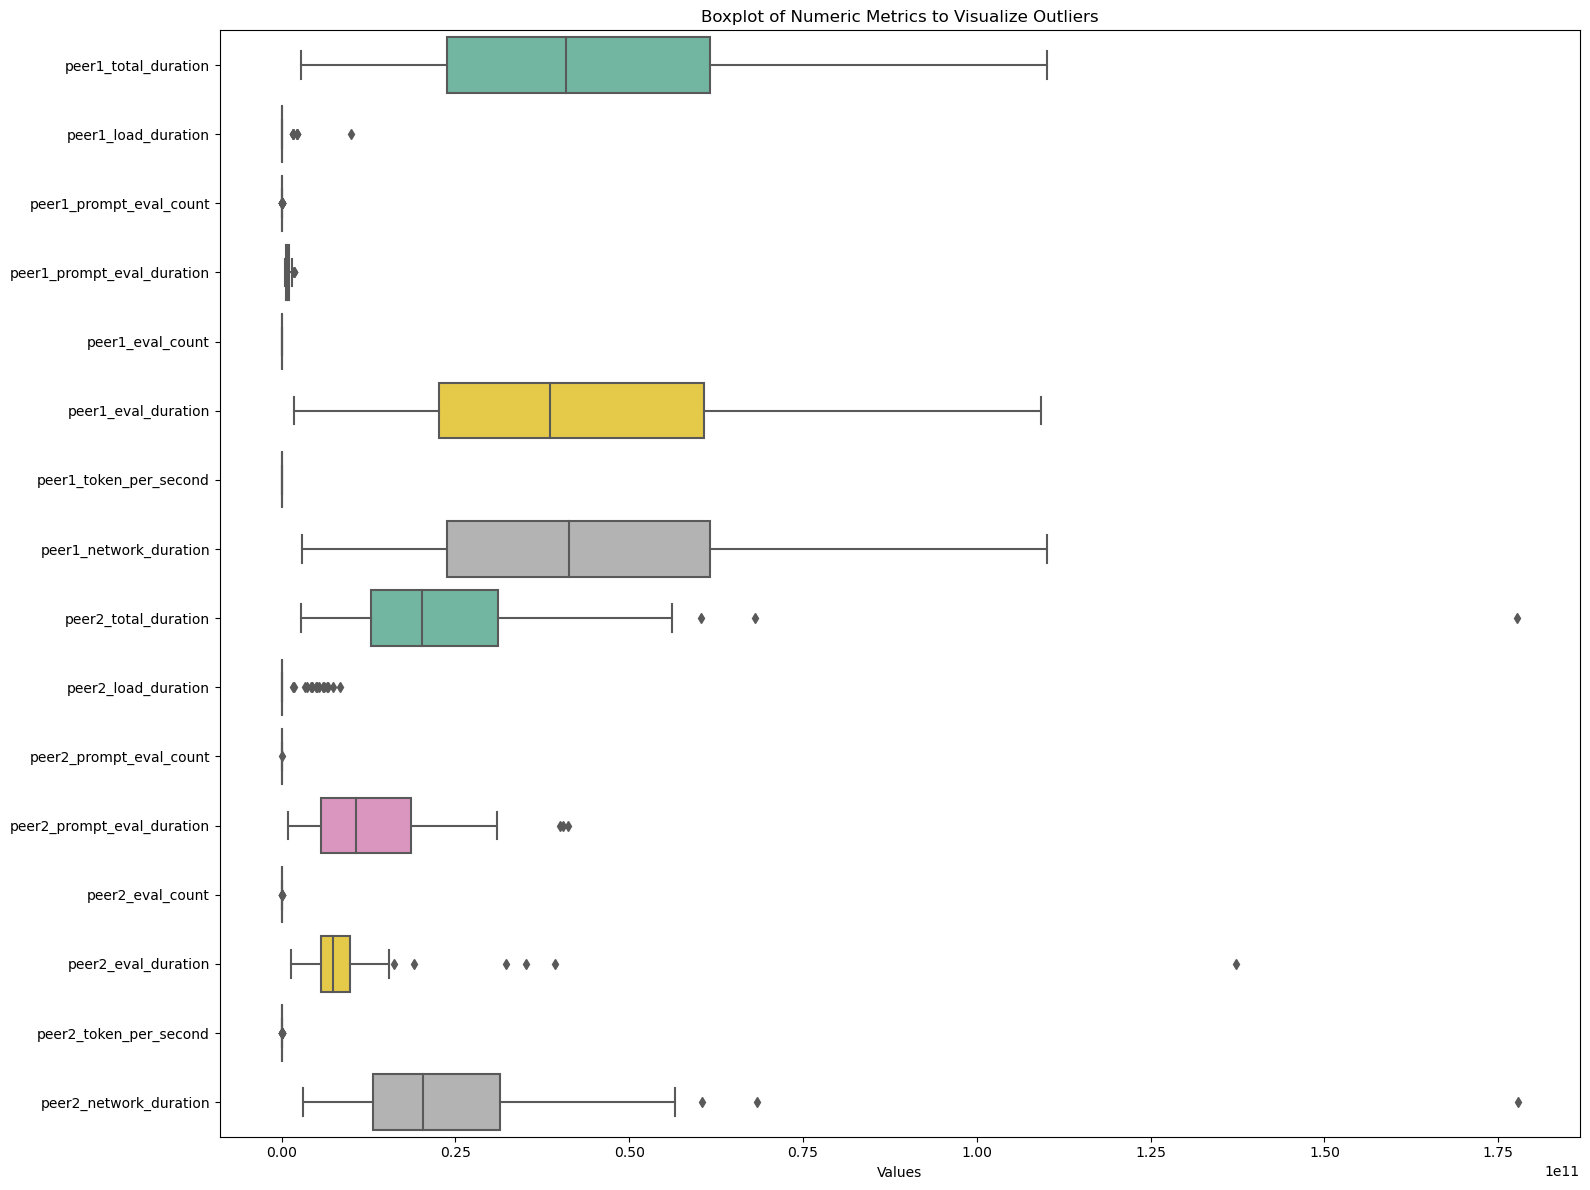

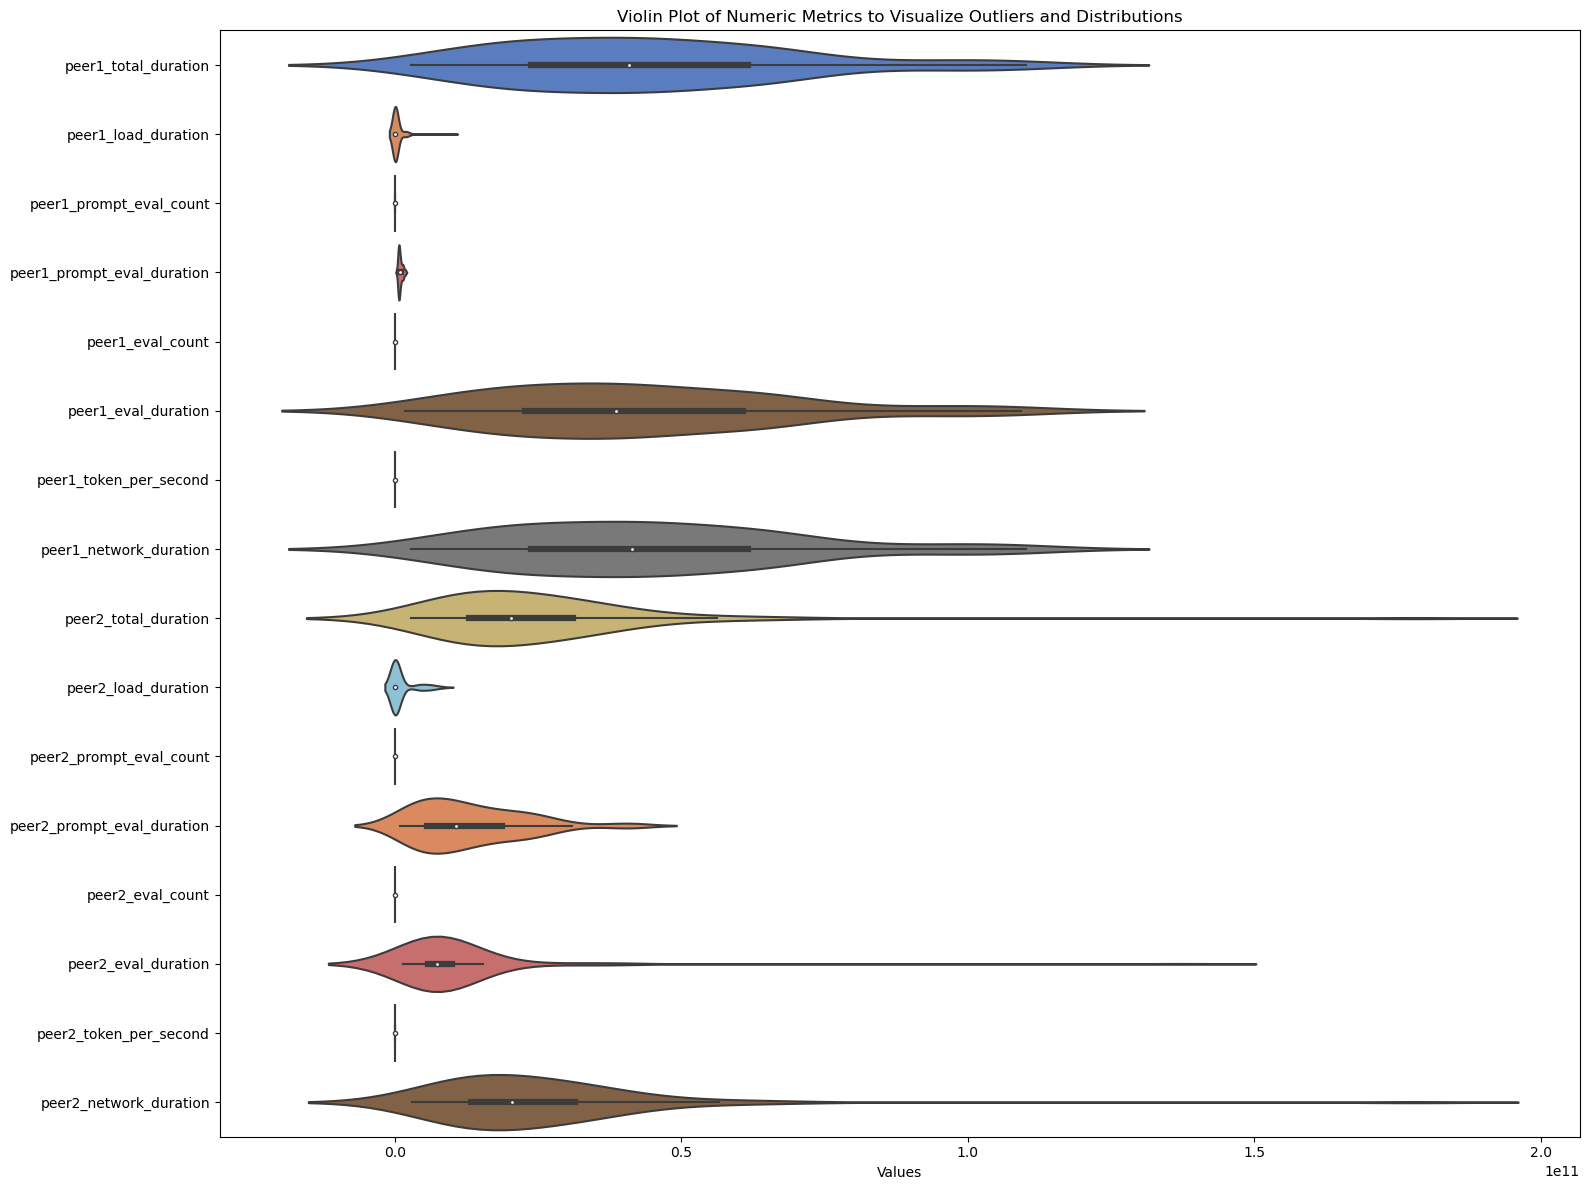

In [10]:
# violin plot for outlier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop specified columns for analysis
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt"
]
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Select numeric columns for visualization
numeric_columns = filtered_df.select_dtypes(include=['float64', 'int64']).columns

# Boxplot to visualize outliers
plt.figure(figsize=(16, 12))
sns.boxplot(data=filtered_df[numeric_columns], orient='h', palette="Set2")
plt.title("Boxplot of Numeric Metrics to Visualize Outliers")
plt.xlabel("Values")
plt.tight_layout()
plt.show()

# Violin plot to visualize outliers and distributions
plt.figure(figsize=(16, 12))
sns.violinplot(data=filtered_df[numeric_columns], orient='h', palette="muted", scale='width')
plt.title("Violin Plot of Numeric Metrics to Visualize Outliers and Distributions")
plt.xlabel("Values")
plt.tight_layout()
plt.show()


In [11]:
# ANOVA for peer1 metrics by by web_server

import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define columns for ANOVA testing
columns_to_test = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration"
]

# Drop non-numeric and group-related columns
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt"
]
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Results storage
anova_results = {}

# Perform ANOVA for each column by web server type
for column in columns_to_test:
    grouped_data = filtered_df.groupby(df['web_server'])[column]
    anova_result = stats.f_oneway(*[group for _, group in grouped_data])

    # Store results
    anova_results[column] = {
        "F-statistic": anova_result.statistic,
        "p-value": anova_result.pvalue,
        "Significant?": anova_result.pvalue < 0.05
    }

    # Post-hoc analysis if significant
    if anova_result.pvalue < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=filtered_df[column],
            groups=df['web_server'],
            alpha=0.05
        )
        anova_results[column]["Tukey HSD"] = tukey.summary()

# Display results
for column, results in anova_results.items():
    print(f"\nANOVA Results for {column}:")
    print(f"F-statistic: {results['F-statistic']:.3f}")
    print(f"p-value: {results['p-value']:.3f}")
    print(f"Significant Difference? {'Yes' if results['Significant?'] else 'No'}")
    if "Tukey HSD" in results:
        print("\nPost-hoc Tukey HSD Test Results:")
        print(results["Tukey HSD"])
#


ANOVA Results for peer1_total_duration:
F-statistic: 1.021
p-value: 0.315
Significant Difference? No

ANOVA Results for peer1_load_duration:
F-statistic: 1.706
p-value: 0.195
Significant Difference? No

ANOVA Results for peer1_prompt_eval_count:
F-statistic: 0.000
p-value: 1.000
Significant Difference? No

ANOVA Results for peer1_prompt_eval_duration:
F-statistic: 1.201
p-value: 0.277
Significant Difference? No

ANOVA Results for peer1_eval_count:
F-statistic: 1.148
p-value: 0.287
Significant Difference? No

ANOVA Results for peer1_eval_duration:
F-statistic: 1.170
p-value: 0.283
Significant Difference? No

ANOVA Results for peer1_token_per_second:
F-statistic: 0.695
p-value: 0.407
Significant Difference? No

ANOVA Results for peer1_network_duration:
F-statistic: 1.003
p-value: 0.320
Significant Difference? No


In [12]:
# ANOVA for peer2 metrics by web_server

import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define columns for ANOVA testing
columns_to_test = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration"
]

# Drop non-numeric and group-related columns
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt"
]
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Results storage
anova_results = {}

# Perform ANOVA for each column by web server type
for column in columns_to_test:
    grouped_data = filtered_df.groupby(df['web_server'])[column]
    anova_result = stats.f_oneway(*[group for _, group in grouped_data])

    # Store results
    anova_results[column] = {
        "F-statistic": anova_result.statistic,
        "p-value": anova_result.pvalue,
        "Significant?": anova_result.pvalue < 0.05
    }

    # Post-hoc analysis if significant
    if anova_result.pvalue < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=filtered_df[column],
            groups=df['web_server'],
            alpha=0.05
        )
        anova_results[column]["Tukey HSD"] = tukey.summary()

# Display results
for column, results in anova_results.items():
    print(f"\nANOVA Results for {column}:")
    print(f"F-statistic: {results['F-statistic']:.3f}")
    print(f"p-value: {results['p-value']:.3f}")
    print(f"Significant Difference? {'Yes' if results['Significant?'] else 'No'}")
    if "Tukey HSD" in results:
        print("\nPost-hoc Tukey HSD Test Results:")
        print(results["Tukey HSD"])



ANOVA Results for peer2_total_duration:
F-statistic: 0.180
p-value: 0.672
Significant Difference? No

ANOVA Results for peer2_load_duration:
F-statistic: 0.551
p-value: 0.460
Significant Difference? No

ANOVA Results for peer2_prompt_eval_count:
F-statistic: 1.151
p-value: 0.287
Significant Difference? No

ANOVA Results for peer2_prompt_eval_duration:
F-statistic: 2.443
p-value: 0.122
Significant Difference? No

ANOVA Results for peer2_eval_count:
F-statistic: 0.791
p-value: 0.376
Significant Difference? No

ANOVA Results for peer2_eval_duration:
F-statistic: 0.197
p-value: 0.658
Significant Difference? No

ANOVA Results for peer2_token_per_second:
F-statistic: 2.161
p-value: 0.146
Significant Difference? No

ANOVA Results for peer2_network_duration:
F-statistic: 0.184
p-value: 0.669
Significant Difference? No


In [13]:
# ANOVA test on peer1 mterics by  prompt_type

import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Define columns for ANOVA testing
columns_to_test = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration"
]

# Drop non-numeric and group-related columns
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt"
]
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Results storage
# Perform ANOVA for each column by prompt_type
anova_results_prompt_type = {}

for column in columns_to_test:
    grouped_data = filtered_df.groupby(df['prompt_type'])[column]
    anova_result = stats.f_oneway(*[group for _, group in grouped_data])

    # Store results
    anova_results_prompt_type[column] = {
        "F-statistic": anova_result.statistic,
        "p-value": anova_result.pvalue,
        "Significant?": anova_result.pvalue < 0.05
    }

    # Post-hoc analysis if significant
    if anova_result.pvalue < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=filtered_df[column],
            groups=df['prompt_type'],
            alpha=0.05
        )
        anova_results_prompt_type[column]["Tukey HSD"] = tukey.summary()

# Display results for prompt_type
for column, results in anova_results_prompt_type.items():
    print(f"\nANOVA Results for {column} by prompt_type:")
    print(f"F-statistic: {results['F-statistic']:.3f}")
    print(f"p-value: {results['p-value']:.3f}")
    print(f"Significant Difference? {'Yes' if results['Significant?'] else 'No'}")
    if "Tukey HSD" in results:
        print("\nPost-hoc Tukey HSD Test Results:")
        print(results["Tukey HSD"])



ANOVA Results for peer1_total_duration by prompt_type:
F-statistic: 29.992
p-value: 0.000
Significant Difference? Yes

Post-hoc Tukey HSD Test Results:
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
   group1      group2       meandiff     p-adj        lower             upper       reject
------------------------------------------------------------------------------------------
Comparative    Creative  -3915045883.375 0.9612 -20120646524.4826  12290554757.7326  False
Comparative Explanation  -27902870708.75 0.0001 -44108471349.8576 -11697270067.6424   True
Comparative     Logical  -40520788112.25    0.0 -56726388753.3576 -24315187471.1424   True
Comparative   Numerical  -51411900707.25    0.0 -67617501348.3576 -35206300066.1424   True
   Creative Explanation -23987824825.375 0.0008 -40193425466.4826  -7782224184.2674   True
   Creative     Logical -36605742228.875    0.0 -52811342869.9826 -20400141587.7674   True
   Creative   Numerical -474

In [14]:
# ANOVA test on peer2 metrics by  prompt_type 

import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Define columns for ANOVA testing
columns_to_test = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration"
]

# Drop non-numeric and group-related columns
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt"
]
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Results storage
# Perform ANOVA for each column by prompt_type
anova_results_prompt_type = {}

for column in columns_to_test:
    grouped_data = filtered_df.groupby(df['prompt_type'])[column]
    anova_result = stats.f_oneway(*[group for _, group in grouped_data])

    # Store results
    anova_results_prompt_type[column] = {
        "F-statistic": anova_result.statistic,
        "p-value": anova_result.pvalue,
        "Significant?": anova_result.pvalue < 0.05
    }

    # Post-hoc analysis if significant
    if anova_result.pvalue < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=filtered_df[column],
            groups=df['prompt_type'],
            alpha=0.05
        )
        anova_results_prompt_type[column]["Tukey HSD"] = tukey.summary()

# Display results for prompt_type
for column, results in anova_results_prompt_type.items():
    print(f"\nANOVA Results for {column} by prompt_type:")
    print(f"F-statistic: {results['F-statistic']:.3f}")
    print(f"p-value: {results['p-value']:.3f}")
    print(f"Significant Difference? {'Yes' if results['Significant?'] else 'No'}")
    if "Tukey HSD" in results:
        print("\nPost-hoc Tukey HSD Test Results:")
        print(results["Tukey HSD"])



ANOVA Results for peer2_total_duration by prompt_type:
F-statistic: 3.978
p-value: 0.006
Significant Difference? Yes

Post-hoc Tukey HSD Test Results:
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
   group1      group2        meandiff     p-adj        lower            upper       reject
------------------------------------------------------------------------------------------
Comparative    Creative  -8642804472.0625 0.7508 -28759818482.4821 11474209538.3571  False
Comparative Explanation   -12282504079.25 0.4362 -32399518089.6696  7834509931.1696  False
Comparative     Logical  -22130071674.875 0.0238 -42247085685.2946 -2013057664.4554   True
Comparative   Numerical -24917155305.5625 0.0077 -45034169315.9821 -4800141295.1429   True
   Creative Explanation  -3639699607.1875 0.9866 -23756713617.6071 16477314403.2321  False
   Creative     Logical -13487267202.8125 0.3402 -33604281213.2321  6629746807.6071  False
   Creative   Numerical    -1

In [15]:
# ANOVA for peer1 metrics by peer1_llm

import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define columns for ANOVA testing
columns_to_test = [
    "peer1_total_duration",
    "peer1_load_duration",
    "peer1_prompt_eval_count",
    "peer1_prompt_eval_duration",
    "peer1_eval_count",
    "peer1_eval_duration",
    "peer1_token_per_second",
    "peer1_network_duration"
]

# Drop non-numeric and group-related columns
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt"
]
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Results storage
anova_results = {}

# Perform ANOVA for each column by web server type
for column in columns_to_test:
    grouped_data = filtered_df.groupby(df['peer1_llm'])[column]
    anova_result = stats.f_oneway(*[group for _, group in grouped_data])

    # Store results
    anova_results[column] = {
        "F-statistic": anova_result.statistic,
        "p-value": anova_result.pvalue,
        "Significant?": anova_result.pvalue < 0.05
    }

    # Post-hoc analysis if significant
    if anova_result.pvalue < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=filtered_df[column],
            groups=df['web_server'],
            alpha=0.05
        )
        anova_results[column]["Tukey HSD"] = tukey.summary()

# Display results
for column, results in anova_results.items():
    print(f"\nANOVA Results for {column}:")
    print(f"F-statistic: {results['F-statistic']:.3f}")
    print(f"p-value: {results['p-value']:.3f}")
    print(f"Significant Difference? {'Yes' if results['Significant?'] else 'No'}")
    if "Tukey HSD" in results:
        print("\nPost-hoc Tukey HSD Test Results:")
        print(results["Tukey HSD"])



ANOVA Results for peer1_total_duration:
F-statistic: 1.375
p-value: 0.244
Significant Difference? No

ANOVA Results for peer1_load_duration:
F-statistic: 0.315
p-value: 0.576
Significant Difference? No

ANOVA Results for peer1_prompt_eval_count:
F-statistic: 0.358
p-value: 0.551
Significant Difference? No

ANOVA Results for peer1_prompt_eval_duration:
F-statistic: 10.806
p-value: 0.002
Significant Difference? Yes

Post-hoc Tukey HSD Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1 group2  meandiff  p-adj      lower          upper      reject
---------------------------------------------------------------------
fastapi  flask 83875000.0 0.2766 -68515965.3769 236265965.3769  False
---------------------------------------------------------------------

ANOVA Results for peer1_eval_count:
F-statistic: 2.709
p-value: 0.104
Significant Difference? No

ANOVA Results for peer1_eval_duration:
F-statistic: 1.327
p-value: 0.253
Significant Difference? No

In [16]:
# ANOVA for peer2 metrics by peer2_llm

import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define columns for ANOVA testing
columns_to_test = [
    "peer2_total_duration",
    "peer2_load_duration",
    "peer2_prompt_eval_count",
    "peer2_prompt_eval_duration",
    "peer2_eval_count",
    "peer2_eval_duration",
    "peer2_token_per_second",
    "peer2_network_duration"
]

# Drop non-numeric and group-related columns
columns_to_exclude = [
    "peer1_llm",
    "peer2_llm",
    "peer1_response_ollama",
    "peer2_response_ollama",
    "prompt_type",
    "prompt"
]
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Results storage
anova_results = {}

# Perform ANOVA for each column by web server type
for column in columns_to_test:
    grouped_data = filtered_df.groupby(df['peer2_llm'])[column]
    anova_result = stats.f_oneway(*[group for _, group in grouped_data])

    # Store results
    anova_results[column] = {
        "F-statistic": anova_result.statistic,
        "p-value": anova_result.pvalue,
        "Significant?": anova_result.pvalue < 0.05
    }

    # Post-hoc analysis if significant
    if anova_result.pvalue < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=filtered_df[column],
            groups=df['web_server'],
            alpha=0.05
        )
        anova_results[column]["Tukey HSD"] = tukey.summary()

# Display results
for column, results in anova_results.items():
    print(f"\nANOVA Results for {column}:")
    print(f"F-statistic: {results['F-statistic']:.3f}")
    print(f"p-value: {results['p-value']:.3f}")
    print(f"Significant Difference? {'Yes' if results['Significant?'] else 'No'}")
    if "Tukey HSD" in results:
        print("\nPost-hoc Tukey HSD Test Results:")
        print(results["Tukey HSD"])



ANOVA Results for peer2_total_duration:
F-statistic: 7.313
p-value: 0.000
Significant Difference? Yes

Post-hoc Tukey HSD Test Results:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
 group1 group2     meandiff    p-adj        lower            upper      reject
------------------------------------------------------------------------------
fastapi  flask -2083343018.125 0.6724 -11855173140.8034 7688487104.5534  False
------------------------------------------------------------------------------

ANOVA Results for peer2_load_duration:
F-statistic: 0.395
p-value: 0.757
Significant Difference? No

ANOVA Results for peer2_prompt_eval_count:
F-statistic: 0.871
p-value: 0.460
Significant Difference? No

ANOVA Results for peer2_prompt_eval_duration:
F-statistic: 9.015
p-value: 0.000
Significant Difference? Yes

Post-hoc Tukey HSD Test Results:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
 group1 group2    meandiff   p-adj       low